In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

## Read the data as a monthly Time Series from the '.csv' file.

In [2]:
df = pd.read_csv('Sparkling.csv',parse_dates=True,index_col='YearMonth')
df.head()
## Here we will create a separate date range and then add it to the data instead of parsing the dates

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


In [3]:
df.head()

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


In [4]:
df.tail(100)

,Sparkling
YearMonth,
1987-04-01,1935
1987-05-01,1518
1987-06-01,1250
1987-07-01,1847
1987-08-01,1930
...,...
1995-03-01,1897
1995-04-01,1862
1995-05-01,1670


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [6]:
df.tail()

,Sparkling
YearMonth,
1995-03-01,1897
1995-04-01,1862
1995-05-01,1670
1995-06-01,1688
1995-07-01,2031


In [7]:
df.isnull().sum()

Sparkling    0
dtype: int64

## Plot the Time Series to understand the behaviour of the data

In [8]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,8

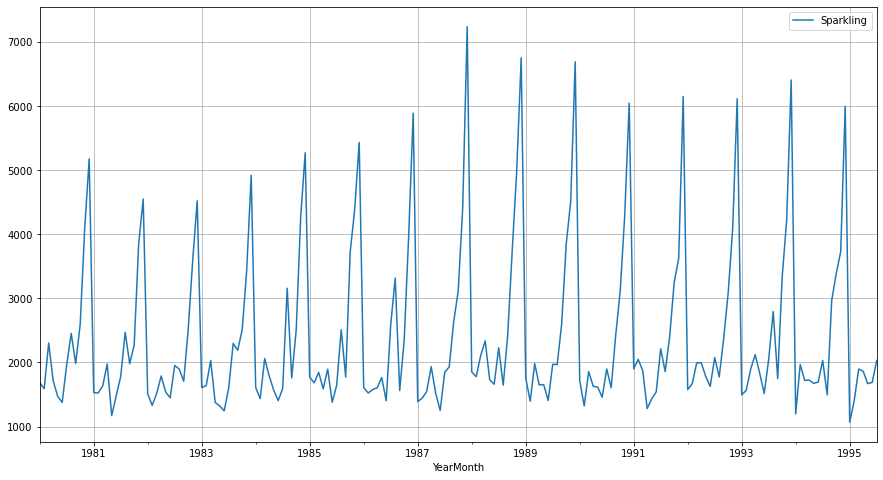

In [9]:
df.plot(grid=True);

## Check the basic measures of descriptive statistics of the Time Series

In [10]:
round(df.describe(),3).T

,count,mean,std,min,25%,50%,75%,max
Sparkling,187.0,2402.417,1295.112,1070.0,1605.0,1874.0,2549.0,7242.0


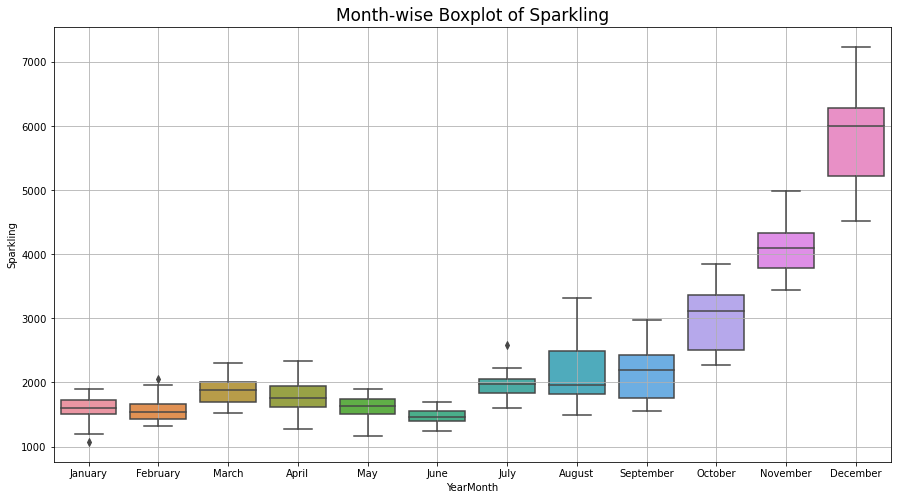

In [11]:
sns.boxplot(x = df.index.month_name(), y = df['Sparkling']);
plt.grid();
plt.title('Month-wise Boxplot of Sparkling', fontsize=17);
plt.savefig('spark_monthwise_box.jpg', bbox_inches='tight');

# Decompose the Time Series and plot the different components.

In [12]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

# Additive Decomposition of Sparkling

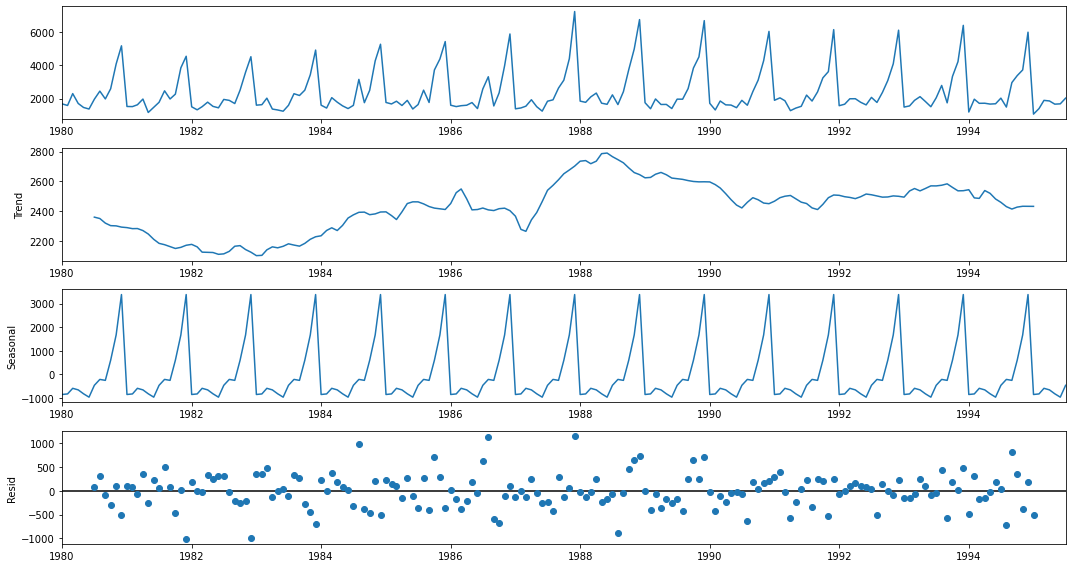

In [13]:
decompositions = seasonal_decompose(df,model='additive')
decompositions.plot();
plt.savefig('decomposes.jpg', bbox_inches='tight');

In [14]:
trend = decompositions.trend
seasonality = decompositions.seasonal
residual = decompositions.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

trend.head(12).to_csv('spark_trend.csv')
seasonality.head(12).to_csv('spark_season.csv')
residual.head(12).to_csv('spark_resid.csv')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    -854.260599
1980-02-01    -830.350678
1980-03-01    -592.356630
1980-04-01    -658.490559
1980-05-01    -824.416154
1980-06-01    -967.434011
1980-07-01    -465.502265
1980-08-01    -214.332821
1980-09-01    -254.677265
1980-10-01     599.769957
1980-11-01    1675.067179
1980-12-01    3386.983846
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01     70.835599
1980-08-01    315.999487
1980-09-01    -81.864401
1980-10-01   -307.353290


In [15]:
cvsa = residual.std()/residual.mean()
cvsa

-296.08335294142995

# Multiplicative Decomposition of Sparkling

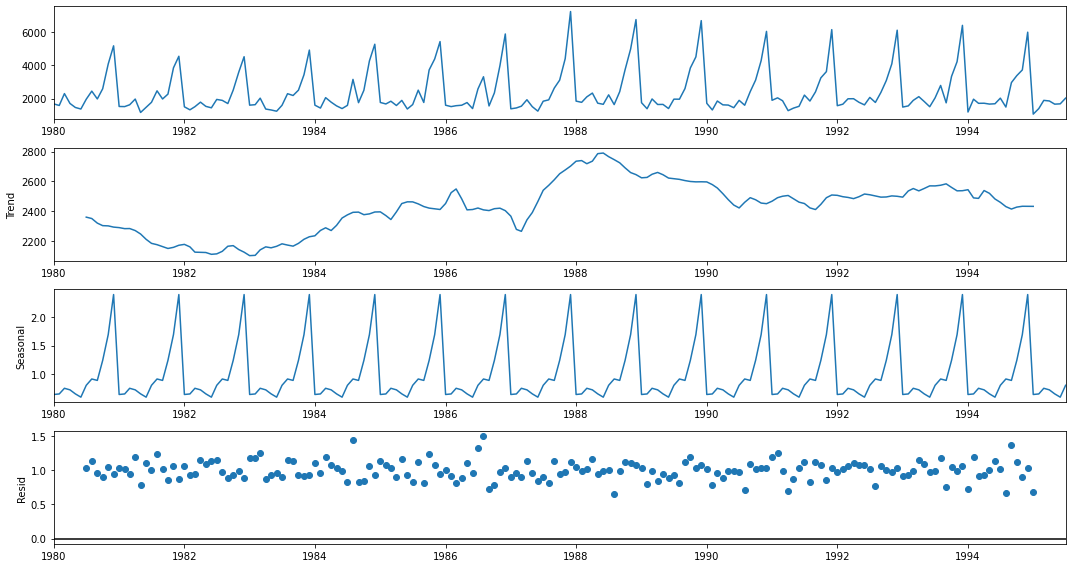

In [16]:
decompositionms = seasonal_decompose(df,model='multiplicative')
decompositionms.plot();
plt.savefig('decomposems.jpg', bbox_inches='tight');

In [17]:
trend = decompositionms.trend
seasonality = decompositionms.seasonal
residual = decompositionms.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

trend.head(12).to_csv('spark_trend_m.csv')
seasonality.head(12).to_csv('spark_season_m.csv')
residual.head(12).to_csv('spark_resid_m.csv')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.649843
1980-02-01    0.659214
1980-03-01    0.757440
1980-04-01    0.730351
1980-05-01    0.660609
1980-06-01    0.603468
1980-07-01    0.809164
1980-08-01    0.918822
1980-09-01    0.894367
1980-10-01    1.241789
1980-11-01    1.690158
1980-12-01    2.384776
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    1.029230
1980-08-01    1.135407
1980-09-01    0.955954
1980-10-01    0.907513
1980-11-01    1.050423
1980-12-01    0.946770
Name: resi

## Split the data into train and test and plot the training and test data. [20%of the most recent data should be in test set]

In [18]:
train    =   df[df.index<'1991'] 
test     =   df[df.index>='1991']

In [19]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


In [20]:
from IPython.display import display

In [21]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


Last few rows of Training Data


,Sparkling
YearMonth,
1990-08-01,1605
1990-09-01,2424
1990-10-01,3116
1990-11-01,4286
1990-12-01,6047


First few rows of Test Data


,Sparkling
YearMonth,
1991-01-01,1902
1991-02-01,2049
1991-03-01,1874
1991-04-01,1279
1991-05-01,1432


Last few rows of Test Data


,Sparkling
YearMonth,
1995-03-01,1897
1995-04-01,1862
1995-05-01,1670
1995-06-01,1688
1995-07-01,2031


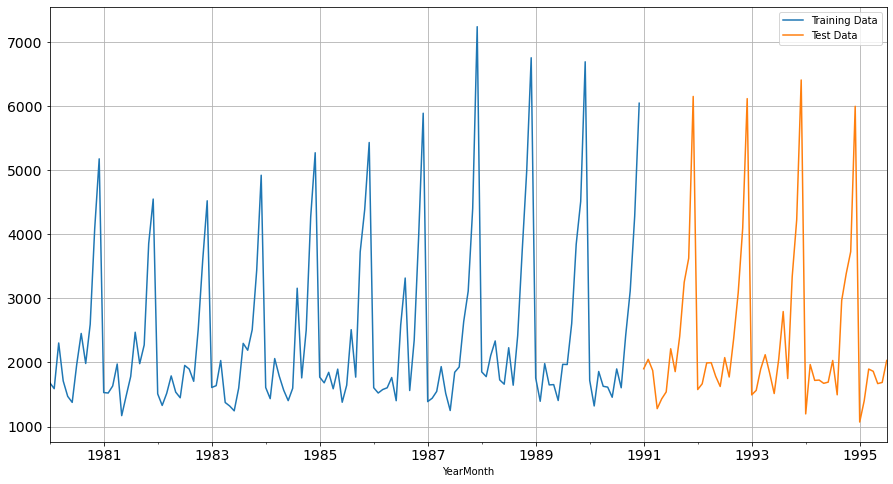

In [22]:
train['Sparkling'].plot(fontsize=14)
test['Sparkling'].plot(fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

##### Note: It is difficult to predict the future observations if such an instance has not happened in the past. From our train-test split we are predicting likewise behaviour as compared to the past years.

# Building different models and comparing the accuracy metrics.

## Model 1: Linear Regression

#### For this particular linear regression, we are going to regress the 'Births' variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.

In [23]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

In [24]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [25]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data')
display(LinearRegression_train.head())
print('Last few rows of Training Data')
display(LinearRegression_train.tail())
print('First few rows of Test Data')
display(LinearRegression_test.head())
print('Last few rows of Test Data')
display(LinearRegression_test.tail())

First few rows of Training Data


,Sparkling,time
YearMonth,,
1980-01-01,1686,1
1980-02-01,1591,2
1980-03-01,2304,3
1980-04-01,1712,4
1980-05-01,1471,5


Last few rows of Training Data


,Sparkling,time
YearMonth,,
1990-08-01,1605,128
1990-09-01,2424,129
1990-10-01,3116,130
1990-11-01,4286,131
1990-12-01,6047,132


First few rows of Test Data


,Sparkling,time
YearMonth,,
1991-01-01,1902,133
1991-02-01,2049,134
1991-03-01,1874,135
1991-04-01,1279,136
1991-05-01,1432,137


Last few rows of Test Data


,Sparkling,time
YearMonth,,
1995-03-01,1897,183
1995-04-01,1862,184
1995-05-01,1670,185
1995-06-01,1688,186
1995-07-01,2031,187


Now that our training and test data has been modified, let us go ahead use $\underline{Linear Regression}$ to build the model on the training data and test the model on the test data.

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
lr = LinearRegression()

In [28]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'])

LinearRegression()

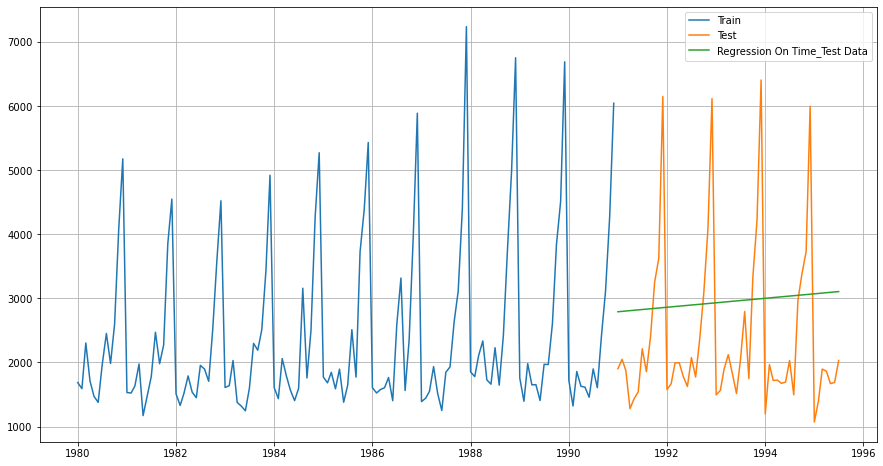

In [29]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.grid();

#### Defining the functions for calculating the accuracy metrics.

In [30]:
from sklearn import metrics

### Model Evaluation

In [31]:
rmse_model1_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1389.135 


In [32]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE
RegressionOnTime,1389.135175


## Model 2: Naive Approach: $\hat{y}_{t+1} = y_t$

#### For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.

In [33]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [34]:
train.tail()

,Sparkling
YearMonth,
1990-08-01,1605
1990-09-01,2424
1990-10-01,3116
1990-11-01,4286
1990-12-01,6047


In [35]:
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    6047
1991-02-01    6047
1991-03-01    6047
1991-04-01    6047
1991-05-01    6047
Name: naive, dtype: int64

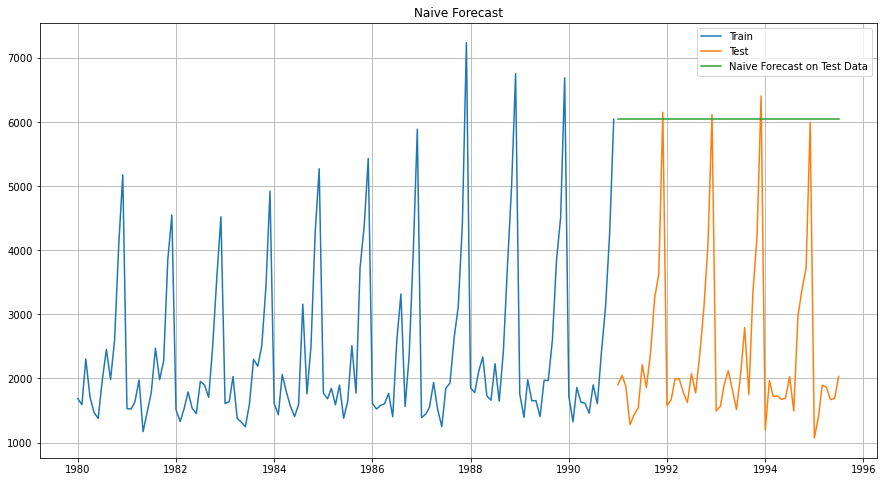

In [36]:
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

### Model Evaluation

In [37]:
rmse_model2_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 3864.279


In [38]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352


## Method 3: Simple Average

#### For this particular simple average method, we will forecast by using the average of the training values.

In [39]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [40]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

,Sparkling,mean_forecast
YearMonth,,
1991-01-01,1902,2403.780303
1991-02-01,2049,2403.780303
1991-03-01,1874,2403.780303
1991-04-01,1279,2403.780303
1991-05-01,1432,2403.780303


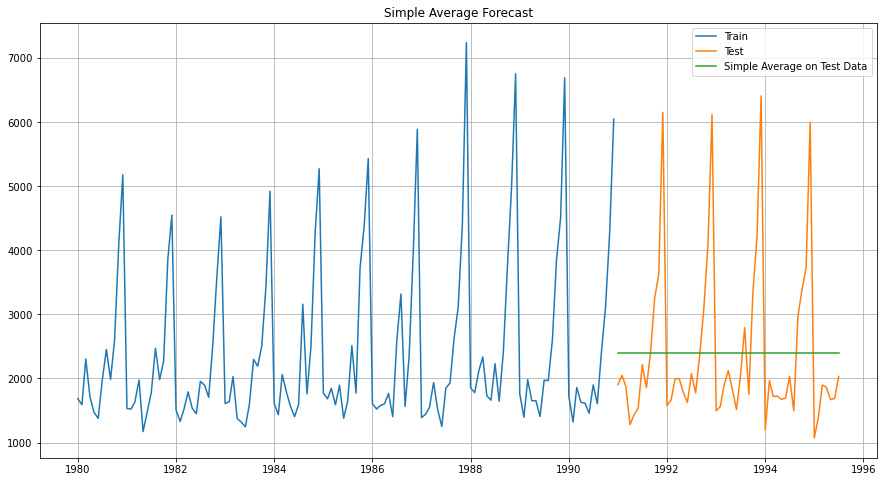

In [41]:
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

### Model Evaluation

In [42]:
rmse_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 1275.082


In [43]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804


## Method 4: Moving Average(MA)

#### For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.

###### For Moving Average, we are going to average over the entire data.

In [44]:
MovingAverage = df.copy()
MovingAverage.head()

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


#### Trailing moving averages

In [45]:

MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head()

,Sparkling,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,
1980-01-01,1686,NaN,NaN,NaN,NaN
1980-02-01,1591,1638.5,NaN,NaN,NaN
1980-03-01,2304,1947.5,NaN,NaN,NaN
1980-04-01,1712,2008.0,1823.25,NaN,NaN
1980-05-01,1471,1591.5,1769.50,NaN,NaN


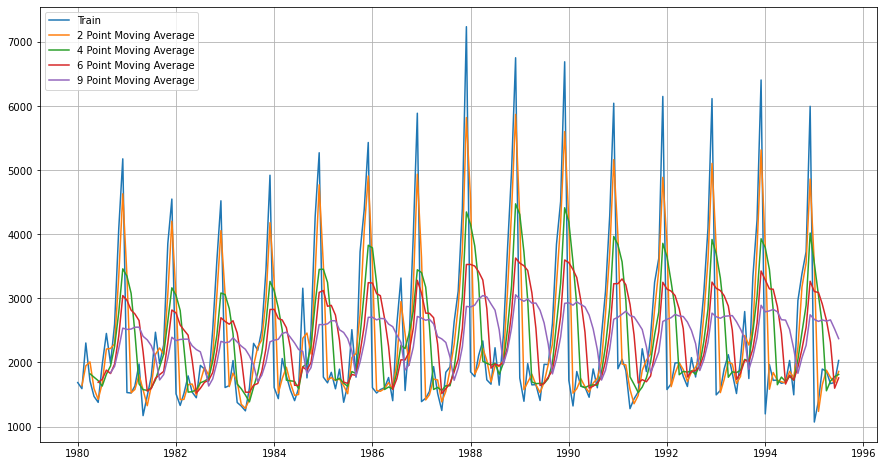

In [46]:
## Plotting on the whole data

plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

In [47]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[MovingAverage.index<'1991'] 
trailing_MovingAverage_test=MovingAverage[MovingAverage.index>='1991']

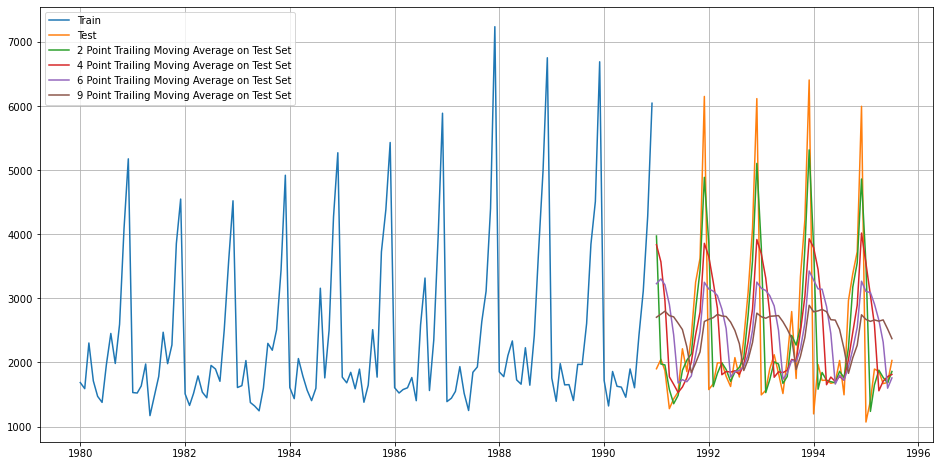

In [48]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

### Model Evaluation

##### Done only on the test data.

In [49]:
## Test Data - RMSE  --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 813.401
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1156.590
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1283.927
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1346.278


In [50]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315


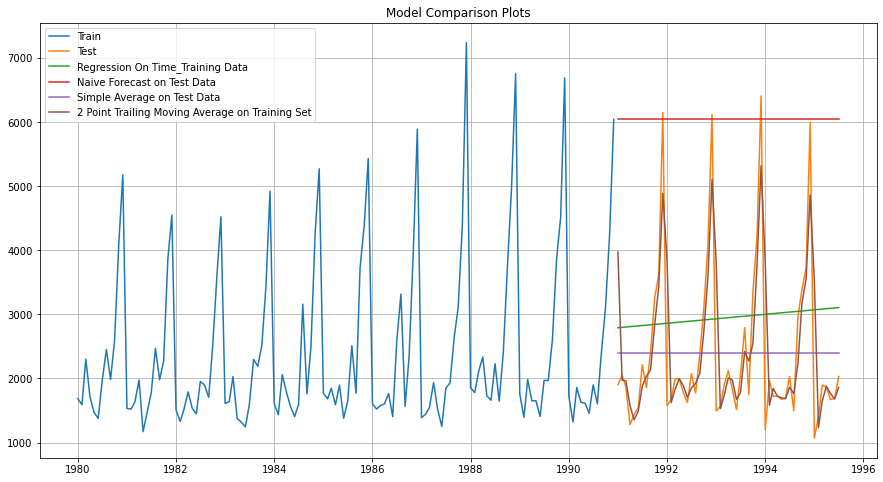

In [51]:
## Plotting on both Training and Test data

plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Training Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

# SES - ETS(A, N, N) - Simple Exponential Smoothing with additive errors
The simplest of the exponentially smoothing methods is naturally called simple exponential smoothing (SES).
This method is suitable for forecasting data with no clear trend or seasonal pattern.
In Single ES, the forecast at time (t + 1) is given by Winters,1960

𝐹𝑡+1=𝛼𝑌𝑡+(1−𝛼)𝐹𝑡 
Parameter  𝛼  is called the smoothing constant and its value lies between 0 and 1. Since the model uses only one smoothing constant, it is called Single Exponential Smoothing.

Note: Here, there is both trend and seasonality in the data. So, we should have directly gone for the Triple Exponential Smoothing but Simple Exponential Smoothing and the Double Exponential Smoothing models are built over here to get an idea of how the three types of models compare in this case.

In [52]:
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display                 import display
from   pylab                           import rcParams

In [53]:
model_SES = SimpleExpSmoothing(train,initialization_method='estimated')

C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [54]:
model_SES_autofit = model_SES.fit(optimized=True)

C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [55]:
model_SES_autofit.params

{'smoothing_level': 0.07029120765764557,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1764.0137060346985,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [56]:
# Using the fitted model on the training set to forecast on the test set
SES_predict = model_SES_autofit.forecast(steps=len(test))
SES_predict

1991-01-01    2804.675124
1991-02-01    2804.675124
1991-03-01    2804.675124
1991-04-01    2804.675124
1991-05-01    2804.675124
1991-06-01    2804.675124
1991-07-01    2804.675124
1991-08-01    2804.675124
1991-09-01    2804.675124
1991-10-01    2804.675124
1991-11-01    2804.675124
1991-12-01    2804.675124
1992-01-01    2804.675124
1992-02-01    2804.675124
1992-03-01    2804.675124
1992-04-01    2804.675124
1992-05-01    2804.675124
1992-06-01    2804.675124
1992-07-01    2804.675124
1992-08-01    2804.675124
1992-09-01    2804.675124
1992-10-01    2804.675124
1992-11-01    2804.675124
1992-12-01    2804.675124
1993-01-01    2804.675124
1993-02-01    2804.675124
1993-03-01    2804.675124
1993-04-01    2804.675124
1993-05-01    2804.675124
1993-06-01    2804.675124
1993-07-01    2804.675124
1993-08-01    2804.675124
1993-09-01    2804.675124
1993-10-01    2804.675124
1993-11-01    2804.675124
1993-12-01    2804.675124
1994-01-01    2804.675124
1994-02-01    2804.675124
1994-03-01  

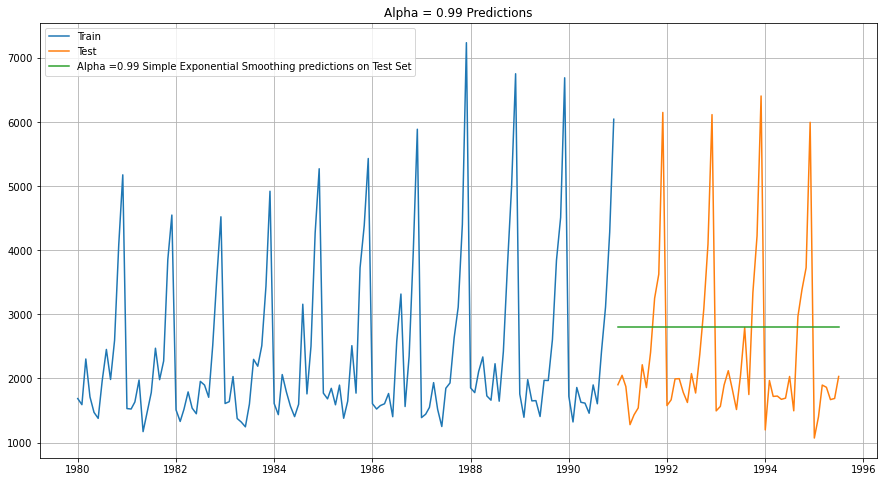

In [57]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha =0.99 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.99 Predictions');

In [58]:
def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [59]:
print('SES RMSE:',mean_squared_error(test.values,SES_predict.values,squared=False))
#different way to calculate RMSE
print('SES RMSE (calculated using statsmodels):',em.rmse(test.values,SES_predict.values)[0])

SES RMSE: 1338.0083844916467
SES RMSE (calculated using statsmodels): 1338.0083844916464


In [60]:
resultsDf = pd.DataFrame({'Test RMSE': [em.rmse(test.values,SES_predict.values)[0]]},index=['Alpha=0.99,SES'])
resultsDf

,Test RMSE
"Alpha=0.99,SES",1338.008384


# Holt - ETS(A, A, N) - Holt's linear method with additive errors
Double Exponential Smoothing
One of the drawbacks of the simple exponential smoothing is that the model does not do well in the presence of the trend.
This model is an extension of SES known as Double Exponential model which estimates two smoothing parameters.
Applicable when data has Trend but no seasonality.
Two separate components are considered: Level and Trend.
Level is the local mean.
One smoothing parameter α corresponds to the level series
A second smoothing parameter β corresponds to the trend series.

# Double Exponential Smoothing uses two equations to forecast future values of the time series, one for forecating the short term avarage value or level and the other for capturing the trend.

Intercept or Level equation, 𝐿𝑡 is given by: 𝐿𝑡=𝛼𝑌𝑡+(1−𝛼)𝐹𝑡

Trend equation is given by 𝑇𝑡=𝛽(𝐿𝑡−𝐿𝑡−1)+(1−𝛽)𝑇𝑡−1

Here, 𝛼 and 𝛽 are the smoothing constants for level and trend, respectively,

0 <𝛼 < 1 and 0 < 𝛽 < 1.
The forecast at time t + 1 is given by

𝐹𝑡+1=𝐿𝑡+𝑇𝑡
𝐹𝑡+𝑛=𝐿𝑡+𝑛𝑇𝑡

In [61]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(train,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.6649999999999999, 'smoothing_trend': 0.0001, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1502.1999999999991, 'initial_trend': 74.87272727272739, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [62]:
DES_predict =  model_DES.forecast(len(test))
DES_predict

1991-01-01    5401.733026
1991-02-01    5476.005230
1991-03-01    5550.277433
1991-04-01    5624.549637
1991-05-01    5698.821840
1991-06-01    5773.094044
1991-07-01    5847.366248
1991-08-01    5921.638451
1991-09-01    5995.910655
1991-10-01    6070.182858
1991-11-01    6144.455062
1991-12-01    6218.727266
1992-01-01    6292.999469
1992-02-01    6367.271673
1992-03-01    6441.543876
1992-04-01    6515.816080
1992-05-01    6590.088284
1992-06-01    6664.360487
1992-07-01    6738.632691
1992-08-01    6812.904894
1992-09-01    6887.177098
1992-10-01    6961.449302
1992-11-01    7035.721505
1992-12-01    7109.993709
1993-01-01    7184.265912
1993-02-01    7258.538116
1993-03-01    7332.810320
1993-04-01    7407.082523
1993-05-01    7481.354727
1993-06-01    7555.626930
1993-07-01    7629.899134
1993-08-01    7704.171338
1993-09-01    7778.443541
1993-10-01    7852.715745
1993-11-01    7926.987948
1993-12-01    8001.260152
1994-01-01    8075.532356
1994-02-01    8149.804559
1994-03-01  

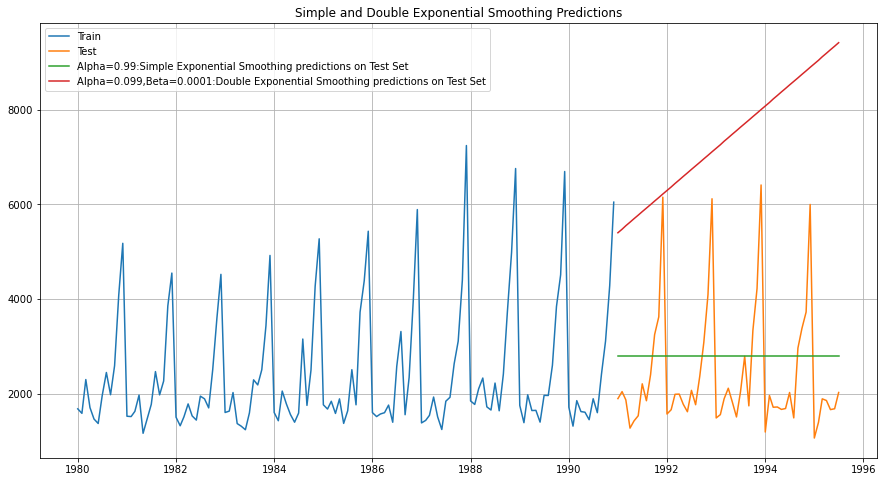

In [63]:

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.99:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.099,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

In [64]:
 print('DES RMSE:',mean_squared_error(test.values,DES_predict.values,squared=False))

DES RMSE: 5291.8798332269125


In [65]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,DES_predict.values,squared=False)]}
                           ,index=['Alpha=1,Beta=0.0189:DES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.99,SES",1338.008384
"Alpha=1,Beta=0.0189:DES",5291.879833


# Holt-Winters - ETS(A, A, A) - Holt Winter's linear method with additive errors¶

In [66]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.11127227248079453, 'smoothing_trend': 0.012360804305088534, 'smoothing_seasonal': 0.46071766688111543, 'damping_trend': nan, 'initial_level': 2356.577980956387, 'initial_trend': -0.10243675533021725, 'initial_seasons': array([-636.23319334, -722.9832009 , -398.64410813, -473.43045416,
       -808.42473284, -815.34991402, -384.23065038,   72.99484403,
       -237.44226045,  272.32608272, 1541.37737052, 2590.07692296]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [67]:
TES_predict =  model_TES.forecast(len(test))
TES_predict

1991-01-01    1490.402890
1991-02-01    1204.525152
1991-03-01    1688.734182
1991-04-01    1551.226125
1991-05-01    1461.197883
1991-06-01    1278.646707
1991-07-01    1804.885616
1991-08-01    1678.955032
1991-09-01    2315.373126
1991-10-01    3224.976222
1991-11-01    4299.301434
1991-12-01    6410.712237
1992-01-01    1482.829908
1992-02-01    1196.952170
1992-03-01    1681.161200
1992-04-01    1543.653143
1992-05-01    1453.624901
1992-06-01    1271.073725
1992-07-01    1797.312634
1992-08-01    1671.382050
1992-09-01    2307.800144
1992-10-01    3217.403240
1992-11-01    4291.728452
1992-12-01    6403.139255
1993-01-01    1475.256926
1993-02-01    1189.379188
1993-03-01    1673.588218
1993-04-01    1536.080160
1993-05-01    1446.051919
1993-06-01    1263.500743
1993-07-01    1789.739652
1993-08-01    1663.809068
1993-09-01    2300.227162
1993-10-01    3209.830258
1993-11-01    4284.155470
1993-12-01    6395.566273
1994-01-01    1467.683944
1994-02-01    1181.806206
1994-03-01  

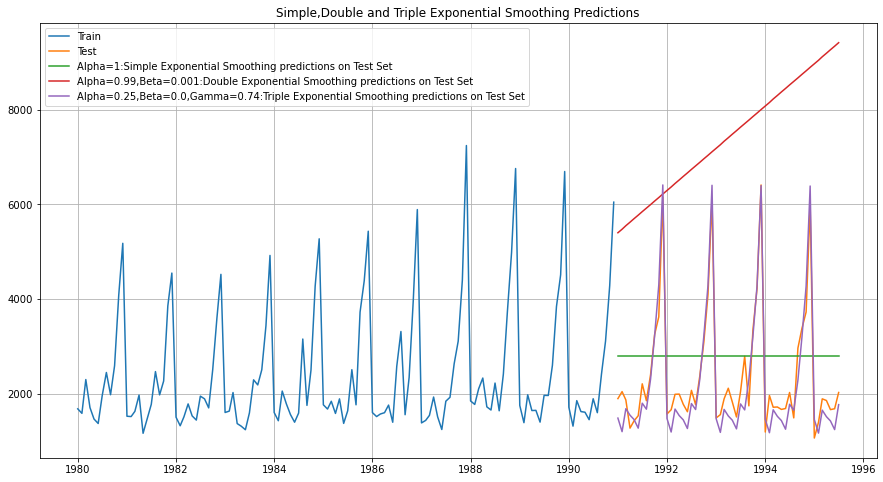

In [68]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=1:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.99,Beta=0.001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [69]:
print('TES RMSE:',mean_squared_error(test.values,TES_predict.values,squared=False))

TES RMSE: 378.95102286703


In [70]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict.values,squared=False)]}
                           ,index=['Alpha=0.25,Beta=0.0,Gamma=0.74:TES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.99,SES",1338.008384
"Alpha=1,Beta=0.0189:DES",5291.879833
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",378.951023


Triple Exponential Smoothing has performed the best on the test as expected since the data had both trend and seasonality.

But we see that our triple exponential smoothing is under forecasting. Let us try to tweak some of the parameters in order to get a better forecast on the test set.

# Holt-Winters - ETS(A, A, M) - Holt Winter's linear method

In [71]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(train,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.11133818361298699, 'smoothing_trend': 0.049505131019509915, 'smoothing_seasonal': 0.3620795793580111, 'damping_trend': nan, 'initial_level': 2356.4967888704355, 'initial_trend': -10.187944726007238, 'initial_seasons': array([0.71296382, 0.68242226, 0.90755008, 0.80515228, 0.65597218,
       0.65414505, 0.88617935, 1.13345121, 0.92046306, 1.21337874,
       1.87340336, 2.37811768]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [72]:
TES_predict_am =  model_TES_am.forecast(len(test))
TES_predict_am

1991-01-01    1587.497468
1991-02-01    1356.394925
1991-03-01    1762.929755
1991-04-01    1656.165933
1991-05-01    1542.002730
1991-06-01    1355.102435
1991-07-01    1854.197719
1991-08-01    1820.513188
1991-09-01    2276.971718
1991-10-01    3122.024202
1991-11-01    4128.528561
1991-12-01    5890.064588
1992-01-01    1538.233708
1992-02-01    1314.193684
1992-03-01    1707.937498
1992-04-01    1604.369388
1992-05-01    1493.650618
1992-06-01    1312.499576
1992-07-01    1795.750753
1992-08-01    1762.976871
1992-09-01    2204.819253
1992-10-01    3022.831861
1992-11-01    3997.009544
1992-12-01    5701.930382
1993-01-01    1488.969948
1993-02-01    1271.992443
1993-03-01    1652.945240
1993-04-01    1552.572843
1993-05-01    1445.298507
1993-06-01    1269.896716
1993-07-01    1737.303788
1993-08-01    1705.440555
1993-09-01    2132.666788
1993-10-01    2923.639519
1993-11-01    3865.490526
1993-12-01    5513.796176
1994-01-01    1439.706189
1994-02-01    1229.791202
1994-03-01  

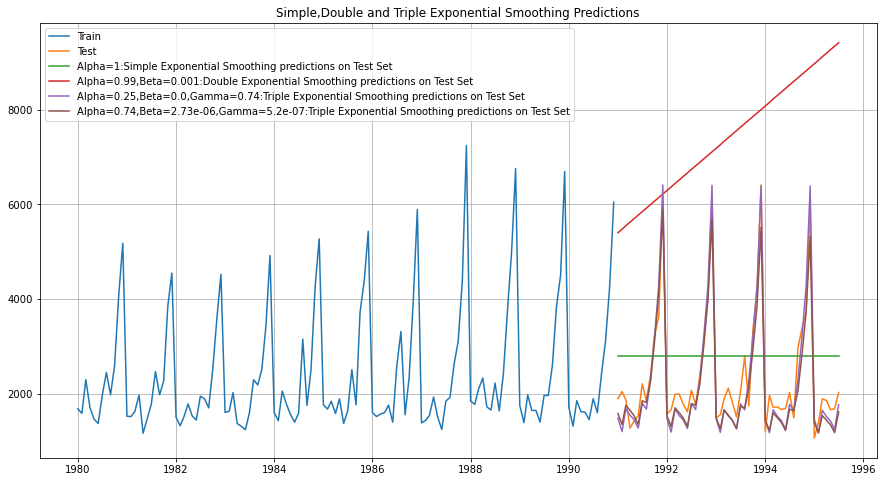

In [73]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=1:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.99,Beta=0.001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am, label='Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [74]:
print('TES_am RMSE:',mean_squared_error(test.values,TES_predict_am.values,squared=False))

TES_am RMSE: 404.286809456071


In [75]:
model_TES_am = ExponentialSmoothing(train,trend='add',seasonal='multiplicative',initialization_method='estimated', damped_trend=True)
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.11107145688834996, 'smoothing_trend': 0.03702380484023058, 'smoothing_seasonal': 0.3950796036927054, 'damping_trend': 0.989999982825801, 'initial_level': 2356.5418225391713, 'initial_trend': -9.179983811285757, 'initial_seasons': array([0.71376402, 0.68480093, 0.8987767 , 0.80479264, 0.65367399,
       0.65451036, 0.87932809, 1.12218765, 0.91400703, 1.19092482,
       1.8470586 , 2.33460239]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [76]:
TES_predict_am_damp_spark =  model_TES_am.forecast(len(test))
TES_predict_am_damp_spark

1991-01-01    1591.419944
1991-02-01    1348.093201
1991-03-01    1768.341538
1991-04-01    1654.055616
1991-05-01    1548.119140
1991-06-01    1363.577884
1991-07-01    1862.874659
1991-08-01    1797.371659
1991-09-01    2310.540570
1991-10-01    3163.686118
1991-11-01    4176.967042
1991-12-01    5994.204873
1992-01-01    1558.919671
1992-02-01    1320.788422
1992-03-01    1732.819735
1992-04-01    1621.103548
1992-05-01    1517.532320
1992-06-01    1336.860067
1992-07-01    1826.676252
1992-08-01    1762.736091
1992-09-01    2266.386531
1992-10-01    3103.732348
1992-11-01    4098.471618
1992-12-01    5882.500803
1993-01-01    1530.111926
1993-02-01    1296.585884
1993-03-01    1701.333753
1993-04-01    1591.895339
1993-05-01    1490.420632
1993-06-01    1313.177804
1993-07-01    1794.590538
1993-08-01    1732.035655
1993-09-01    2227.249068
1993-10-01    3050.590245
1993-11-01    4028.894477
1993-12-01    5783.488026
1994-01-01    1504.577182
1994-02-01    1275.133125
1994-03-01  

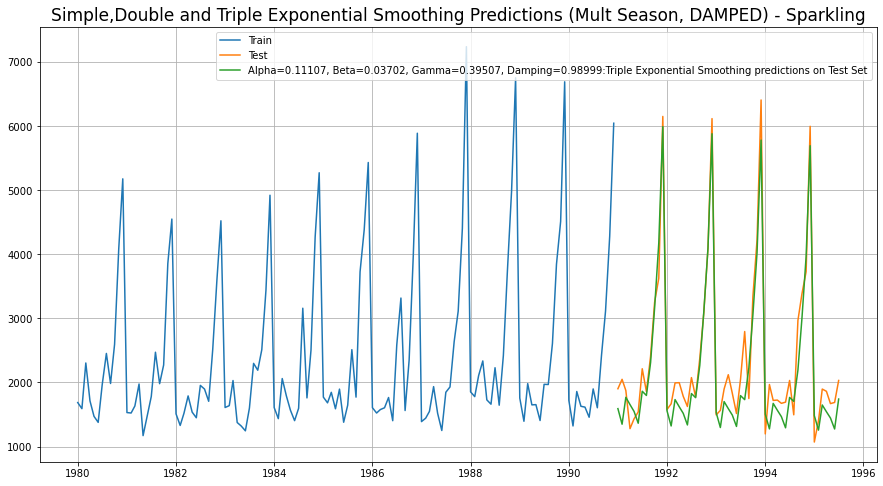

In [77]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')



plt.plot(TES_predict_am_damp_spark, label='Alpha=0.11107, Beta=0.03702, Gamma=0.39507, Damping=0.98999:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions (Mult Season, DAMPED) - Sparkling', fontsize=17);

plt.savefig('spark_mul_damp_tes.jpg', bbox_inches='tight');

In [78]:
print('TES_am DAMPED RMSE_spark:',mean_squared_error(test.values,TES_predict_am_damp_spark.values,squared=False))

TES_am DAMPED RMSE_spark: 352.43982774135344


# Check for stationarity of the whole Time Series data.

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:
* $H_0$ : The Time Series has a unit root and is thus non-stationary.
* $H_1$ : The Time Series does not have a unit root and is thus stationary.

We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the $\alpha$ value.

In [85]:
from statsmodels.tsa.stattools import adfuller

In [86]:
dftest = adfuller(df,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -1.798
DF test p-value is 0.7055958459932753
Number of lags used 12


In [87]:
dftest = adfuller(df.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -44.912
DF test p-value is 0.0
Number of lags used 10


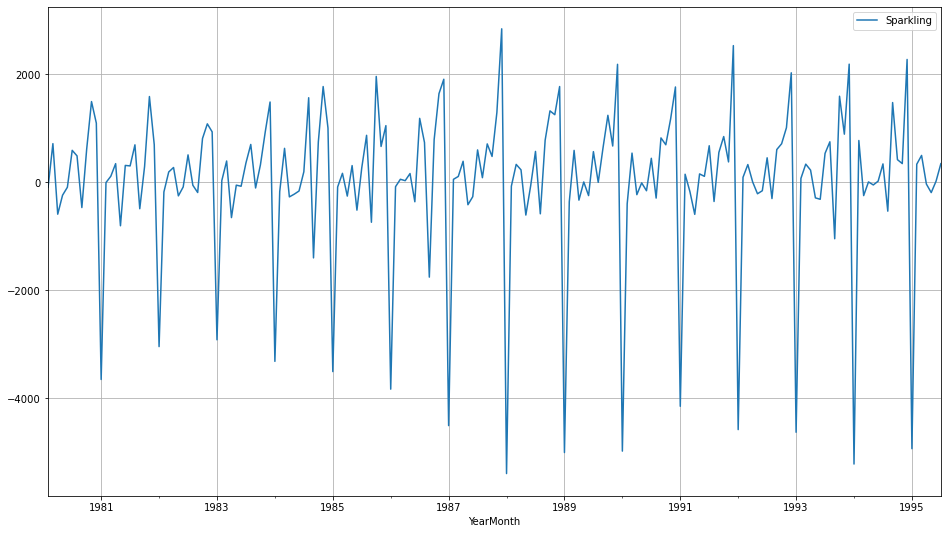

In [88]:
df.diff().dropna().plot(grid=True);

# Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

In [89]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

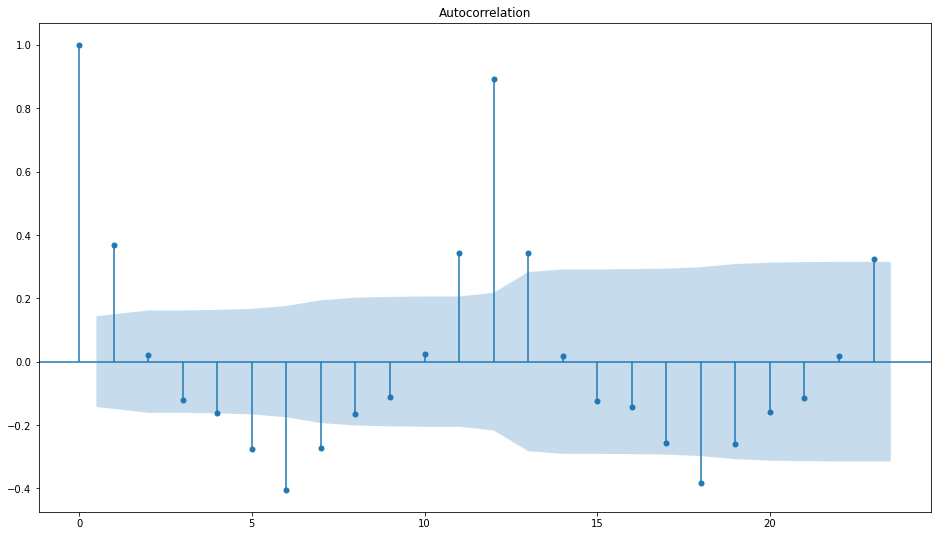

In [90]:
plot_acf(df,alpha=0.05);

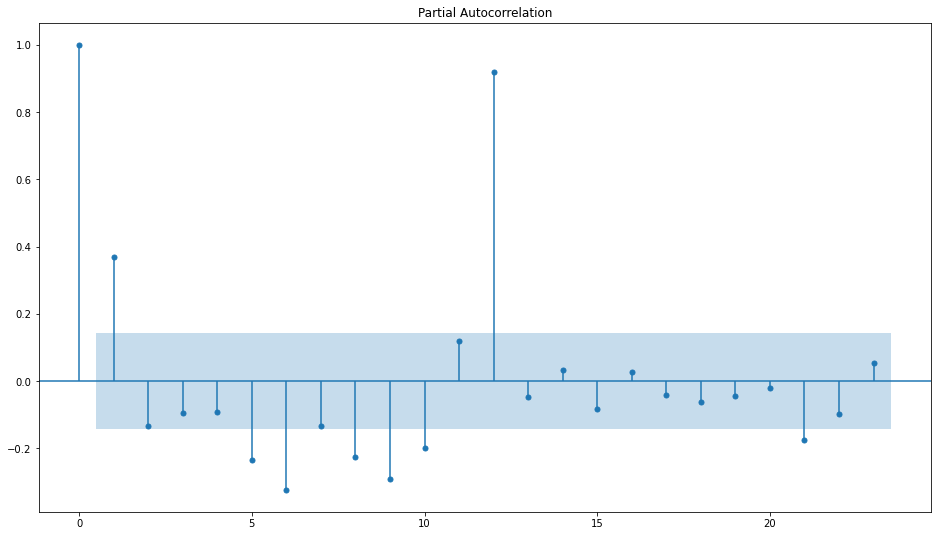

In [91]:
plot_pacf(df,alpha=0.05);

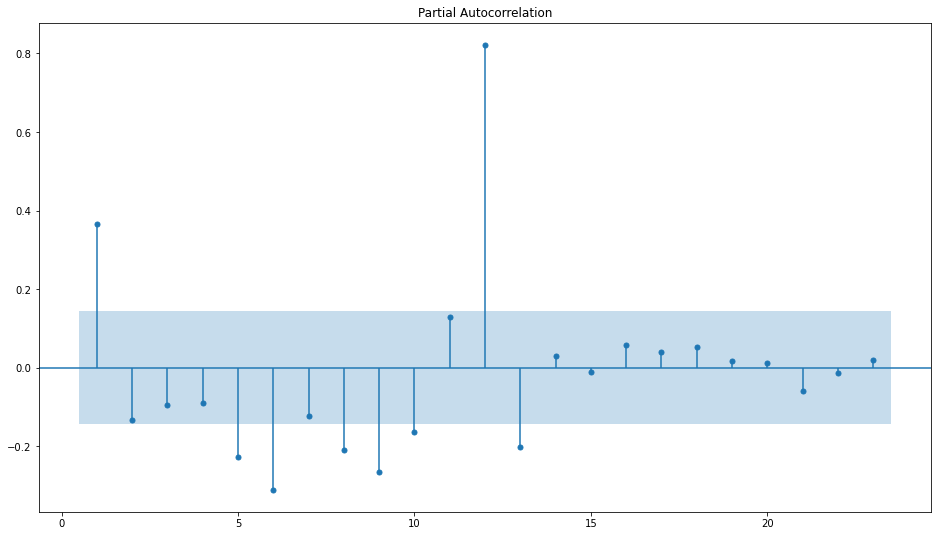

In [92]:
plot_pacf(df,zero=False,alpha=0.05,method='ywmle');

In [93]:
dftest = adfuller(train,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -2.062
DF test p-value is 0.5674110388593686
Number of lags used 12


In [94]:
dftest = adfuller(train.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -7.968
DF test p-value is 8.479210655514366e-11
Number of lags used 11


Now we can reject Null Hypothesis, d=1.

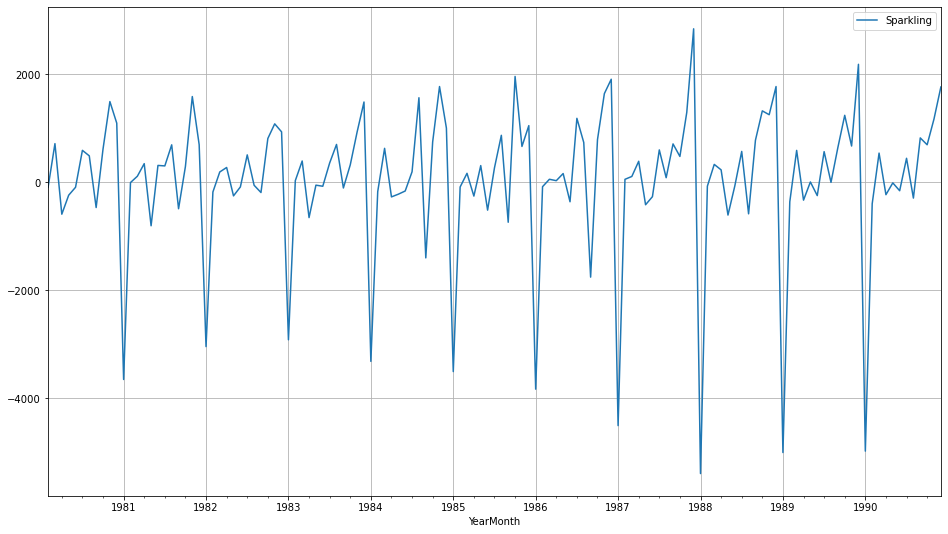

In [95]:
train.diff().dropna().plot(grid=True);

In [96]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-01 to 1990-12-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  132 non-null    int64
dtypes: int64(1)
memory usage: 2.1 KB


# Build an Automated version of an ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

In [97]:
import itertools
p = q = range(0,4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [98]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [99]:
from statsmodels.tsa.arima.model import ARIMA

In [100]:
for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 1, 0) - AIC:2267.6630357855465
ARIMA(0, 1, 1) - AIC:2263.060015591336
ARIMA(0, 1, 2) - AIC:2234.4083231283275
ARIMA(0, 1, 3) - AIC:2233.994857753515
ARIMA(1, 1, 0) - AIC:2266.6085393190087
ARIMA(1, 1, 1) - AIC:2235.755094673383


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1, 1, 2) - AIC:2234.527200452466
ARIMA(1, 1, 3) - AIC:2235.607816390617
ARIMA(2, 1, 0) - AIC:2260.365743968086
ARIMA(2, 1, 1) - AIC:2233.777626239922
ARIMA(2, 1, 2) - AIC:2213.509212306332


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 3) - AIC:2232.921136688177
ARIMA(3, 1, 0) - AIC:2257.72337899794
ARIMA(3, 1, 1) - AIC:2235.498878057432
ARIMA(3, 1, 2) - AIC:2230.759636959836
ARIMA(3, 1, 3) - AIC:2221.4566102276085


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [101]:
ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
10,"(2, 1, 2)",2213.509212
15,"(3, 1, 3)",2221.456610
14,"(3, 1, 2)",2230.759637
11,"(2, 1, 3)",2232.921137
9,"(2, 1, 1)",2233.777626


In [102]:
auto_ARIMA = ARIMA(train, order=(2,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Sun, 22 May 2022   AIC                           2213.509
Time:                        16:19:40   BIC                           2227.885
Sample:                    01-01-1980   HQIC                          2219.351
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.781      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.741      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.217      0.0

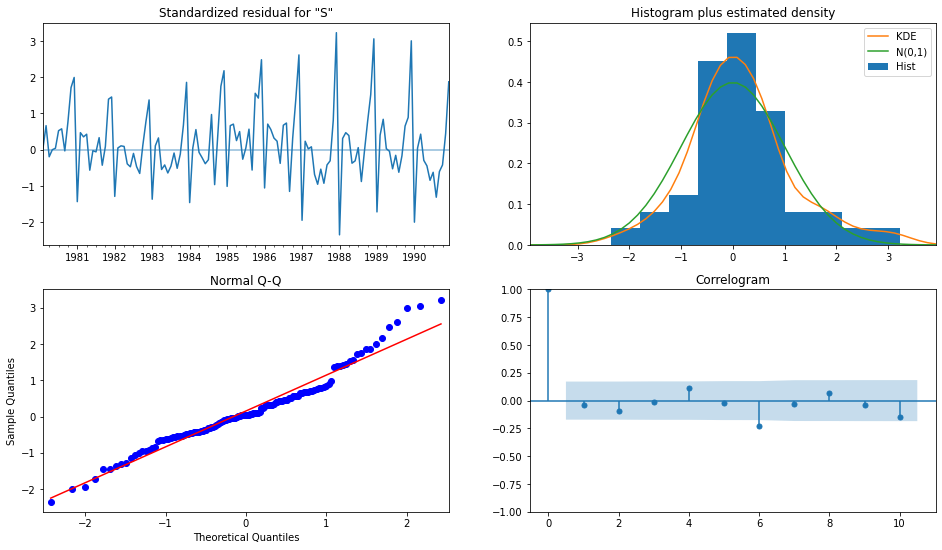

In [103]:
results_auto_ARIMA.plot_diagnostics();

# Predict on the Test Set using this model and evaluate the model.

In [104]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [105]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE

from sklearn.metrics import mean_squared_error

In [106]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Sparkling'],predicted_auto_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 1299.9795689481477 
MAPE: 47.099932436388684


In [107]:
resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(2,1,2)'])

resultsDf

,RMSE,MAPE
"ARIMA(2,1,2)",1299.979569,47.099932


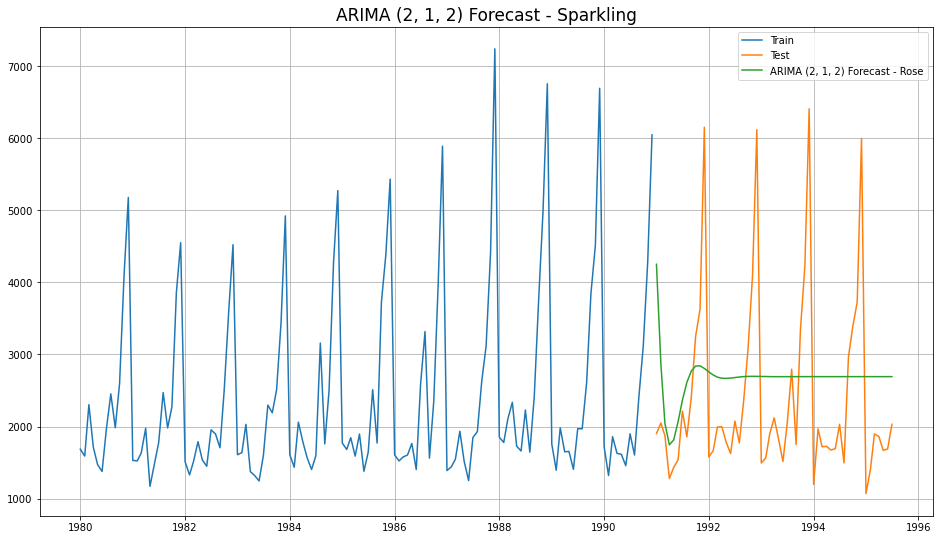

In [108]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(predicted_auto_ARIMA, label = 'ARIMA (2, 1, 2) Forecast - Rose')
plt.grid()
plt.legend(loc='best')
plt.title('ARIMA (2, 1, 2) Forecast - Sparkling', fontsize=17)
plt.savefig('Sparkling_arima_manual_forecast.jpg', bbox_inches='tight');

# Build a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.

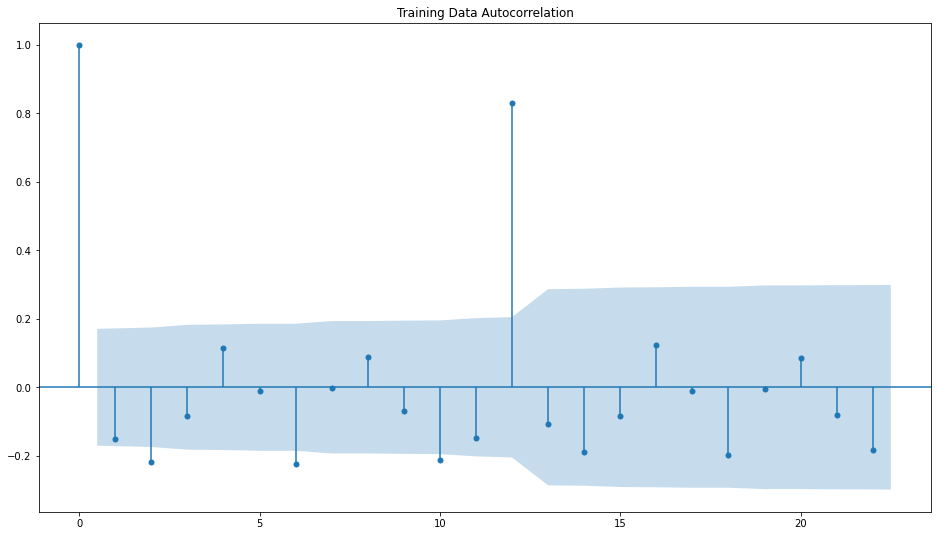

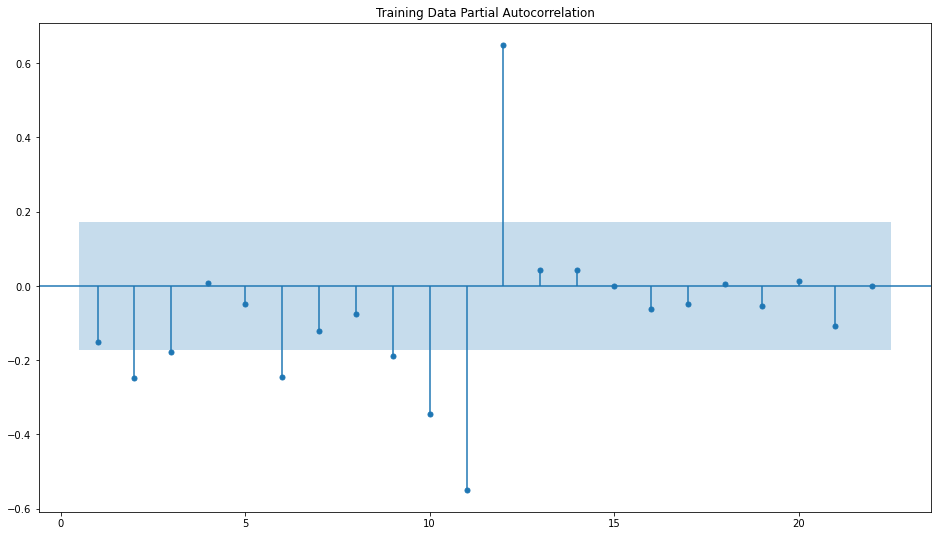

In [109]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle')
plt.show()

In [110]:
manual_ARIMA = ARIMA(train['Sparkling'], order=(1,1,1))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1114.878
Date:                Sun, 22 May 2022   AIC                           2235.755
Time:                        16:21:31   BIC                           2244.381
Sample:                    01-01-1980   HQIC                          2239.260
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4494      0.043     10.366      0.000       0.364       0.534
ma.L1         -0.9996      0.102     -9.811      0.000      -1.199      -0.800
sigma2      1.401e+06   7.57e-08   1.85e+13      0.0

C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


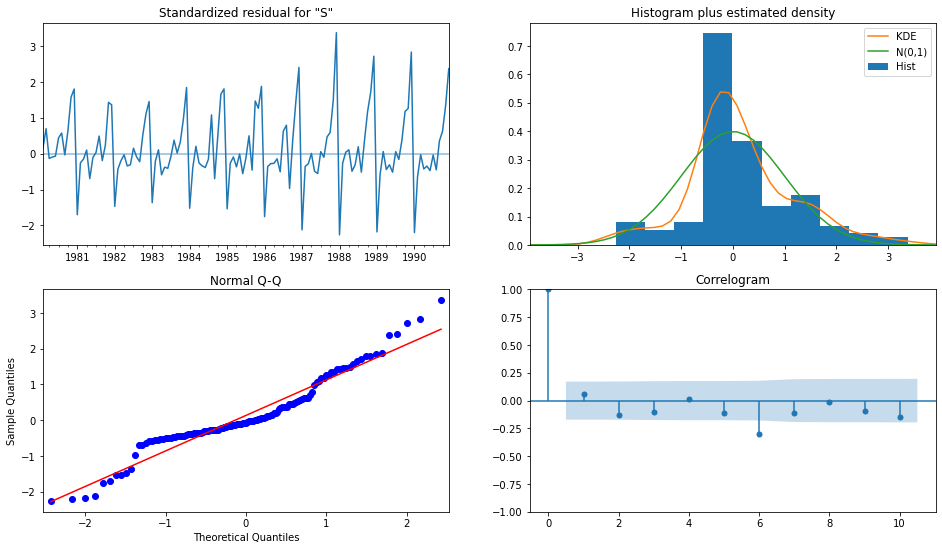

In [111]:
results_manual_ARIMA.plot_diagnostics();

In [112]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [113]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE

from sklearn.metrics import mean_squared_error

In [114]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Sparkling'],predicted_manual_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 1319.9367355315142 
MAPE: 42.091703891301286


In [115]:
resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(1,1,1)'])

resultsDf

,RMSE,MAPE
"ARIMA(1,1,1)",1319.936736,42.091704


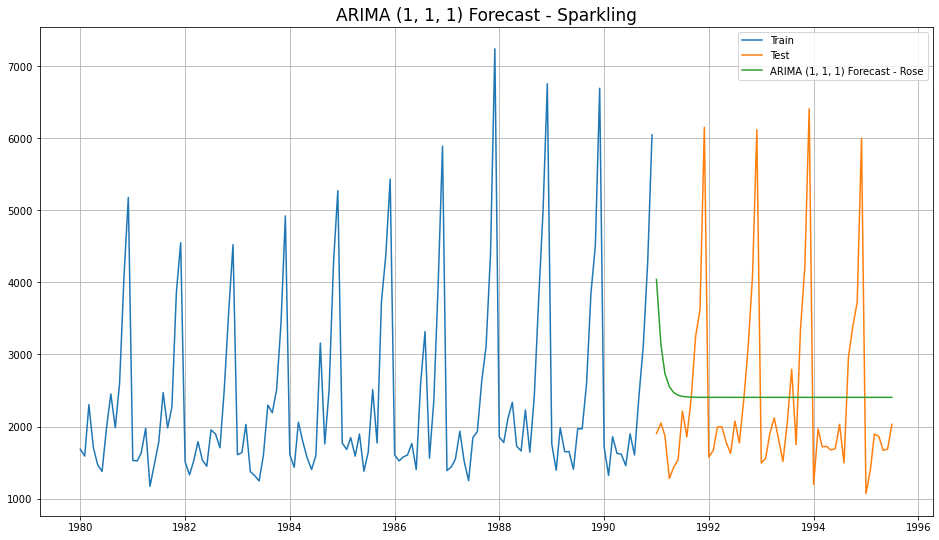

In [158]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(predicted_manual_ARIMA, label = 'ARIMA (1, 1, 1) Forecast - Rose')
plt.grid()
plt.legend(loc='best')
plt.title('ARIMA (1, 1, 1) Forecast - Sparkling', fontsize=17)
plt.savefig('Sparkling_arima_manual_forecast.jpg', bbox_inches='tight');

# SARIMA - Automated

# Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

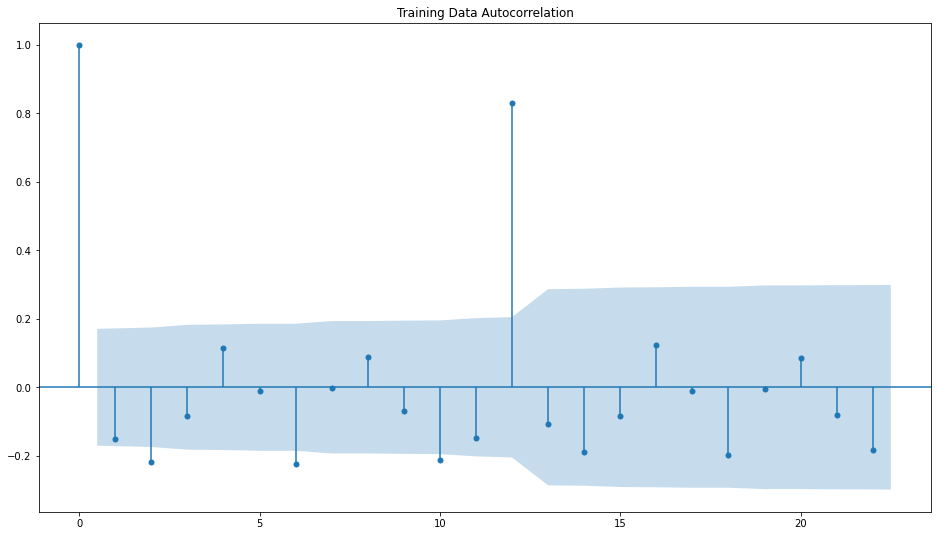

In [117]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop');

In [118]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)


In [119]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [120]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.2614616846013
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.1533640236748
SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:4134.971276134651
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.4366022456675
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.9905301388796
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.2108735791871


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC:4058.6845476069
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470856
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.2054158610893
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.9898053920836
SARIMA(0, 1, 0)x(2, 0, 3, 12) - AIC:3405.3041762535813
SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC:1467.4574095308406
SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC:1469.1871052625402
SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC:1471.0594530063963


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC:3627.3034258414905
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.1629078505825
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.7688649566526
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1692.7089573264204


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(0, 0, 3, 12) - AIC:3719.7133940818608
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1797.1795881838495
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1738.090319377595
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1570.1509144030938


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(1, 0, 3, 12) - AIC:3524.361152446739
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1605.6751954177198
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1599.2245085400543
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1570.4018826079407
SARIMA(0, 1, 1)x(2, 0, 3, 12) - AIC:3356.5342580691645
SARIMA(0, 1, 1)x(3, 0, 0, 12) - AIC:1428.460767961701
SARIMA(0, 1, 1)x(3, 0, 1, 12) - AIC:1428.8727987083223
SARIMA(0, 1, 1)x(3, 0, 2, 12) - AIC:1429.588938086388


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(3, 0, 3, 12) - AIC:2605.335187912286
SARIMA(0, 1, 2)x(0, 0, 0, 12) - AIC:2187.441010168729
SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:1887.9128007202514
SARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:1659.878989082306


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(0, 0, 3, 12) - AIC:4331.051094159748
SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:1790.032633215157
SARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC:1724.1675070727338
SARIMA(0, 1, 2)x(1, 0, 2, 12) - AIC:1557.1605068181761
SARIMA(0, 1, 2)x(1, 0, 3, 12) - AIC:3835.29130708068
SARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:1603.9654774397775
SARIMA(0, 1, 2)x(2, 0, 1, 12) - AIC:1600.5438855184834
SARIMA(0, 1, 2)x(2, 0, 2, 12) - AIC:1557.121578530881


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(2, 0, 3, 12) - AIC:3810.7438579548175
SARIMA(0, 1, 2)x(3, 0, 0, 12) - AIC:1428.5993407963956
SARIMA(0, 1, 2)x(3, 0, 1, 12) - AIC:1429.7448370299162
SARIMA(0, 1, 2)x(3, 0, 2, 12) - AIC:1430.6883858502651


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(3, 0, 3, 12) - AIC:3229.4090020225663
SARIMA(0, 1, 3)x(0, 0, 0, 12) - AIC:2168.092540844187
SARIMA(0, 1, 3)x(0, 0, 1, 12) - AIC:1873.9770698376417
SARIMA(0, 1, 3)x(0, 0, 2, 12) - AIC:1643.2973661170718


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(0, 0, 3, 12) - AIC:3048.6183006533597
SARIMA(0, 1, 3)x(1, 0, 0, 12) - AIC:1792.030301766387
SARIMA(0, 1, 3)x(1, 0, 1, 12) - AIC:1710.6404078503963
SARIMA(0, 1, 3)x(1, 0, 2, 12) - AIC:1542.7418975897892


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(1, 0, 3, 12) - AIC:2733.1693716163577
SARIMA(0, 1, 3)x(2, 0, 0, 12) - AIC:1604.571580767105
SARIMA(0, 1, 3)x(2, 0, 1, 12) - AIC:1601.0674819799099
SARIMA(0, 1, 3)x(2, 0, 2, 12) - AIC:1543.0486194420882
SARIMA(0, 1, 3)x(2, 0, 3, 12) - AIC:2594.906750557843
SARIMA(0, 1, 3)x(3, 0, 0, 12) - AIC:1429.6529447131174
SARIMA(0, 1, 3)x(3, 0, 1, 12) - AIC:1441.143517474256
SARIMA(0, 1, 3)x(3, 0, 2, 12) - AIC:1431.1489972851716


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(3, 0, 3, 12) - AIC:3002.7074663241006
SARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:2250.3181267386713
SARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1954.3938339904391
SARIMA(1, 1, 0)x(0, 0, 2, 12) - AIC:1721.2688476354874


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(0, 0, 3, 12) - AIC:3945.013105515146
SARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:1811.2440279330933
SARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:1788.5343594768467
SARIMA(1, 1, 0)x(1, 0, 2, 12) - AIC:1616.4894405860919


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(1, 0, 3, 12) - AIC:3762.764805255036
SARIMA(1, 1, 0)x(2, 0, 0, 12) - AIC:1621.6355080129133
SARIMA(1, 1, 0)x(2, 0, 1, 12) - AIC:1617.1356133219958
SARIMA(1, 1, 0)x(2, 0, 2, 12) - AIC:1616.5412067483685
SARIMA(1, 1, 0)x(2, 0, 3, 12) - AIC:3363.617847333563
SARIMA(1, 1, 0)x(3, 0, 0, 12) - AIC:1440.5134640370009
SARIMA(1, 1, 0)x(3, 0, 1, 12) - AIC:1442.1719780433298
SARIMA(1, 1, 0)x(3, 0, 2, 12) - AIC:1443.7660392360553


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(3, 0, 3, 12) - AIC:2813.0192234126175
SARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:2204.934049154573
SARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:1907.3558974127466
SARIMA(1, 1, 1)x(0, 0, 2, 12) - AIC:1678.098135263109
SARIMA(1, 1, 1)x(0, 0, 3, 12) - AIC:3780.8143509460565
SARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:1775.1424466870326
SARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:1739.7120332657666
SARIMA(1, 1, 1)x(1, 0, 2, 12) - AIC:1571.3248863599367


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(1, 0, 3, 12) - AIC:3728.4945186962555
SARIMA(1, 1, 1)x(2, 0, 0, 12) - AIC:1590.6161606879166
SARIMA(1, 1, 1)x(2, 0, 1, 12) - AIC:1586.3142234344425
SARIMA(1, 1, 1)x(2, 0, 2, 12) - AIC:1571.806997673572


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(2, 0, 3, 12) - AIC:4957.173539459898
SARIMA(1, 1, 1)x(3, 0, 0, 12) - AIC:1414.9112074373577
SARIMA(1, 1, 1)x(3, 0, 1, 12) - AIC:1415.9502479419625
SARIMA(1, 1, 1)x(3, 0, 2, 12) - AIC:1417.0903507519547


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(3, 0, 3, 12) - AIC:2714.576170430802
SARIMA(1, 1, 2)x(0, 0, 0, 12) - AIC:2188.463345050375
SARIMA(1, 1, 2)x(0, 0, 1, 12) - AIC:1889.7708307500739
SARIMA(1, 1, 2)x(0, 0, 2, 12) - AIC:1659.6291421455642


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(0, 0, 3, 12) - AIC:4582.480790909976
SARIMA(1, 1, 2)x(1, 0, 0, 12) - AIC:1771.8259799349605
SARIMA(1, 1, 2)x(1, 0, 1, 12) - AIC:1723.99521831177
SARIMA(1, 1, 2)x(1, 0, 2, 12) - AIC:1555.5842478283373


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(1, 0, 3, 12) - AIC:4379.534258402953
SARIMA(1, 1, 2)x(2, 0, 0, 12) - AIC:1588.4216931771698
SARIMA(1, 1, 2)x(2, 0, 1, 12) - AIC:1585.5152893733252
SARIMA(1, 1, 2)x(2, 0, 2, 12) - AIC:1556.076790161543


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(2, 0, 3, 12) - AIC:3867.5099402869655
SARIMA(1, 1, 2)x(3, 0, 0, 12) - AIC:1413.8102396588083
SARIMA(1, 1, 2)x(3, 0, 1, 12) - AIC:1414.914698263657
SARIMA(1, 1, 2)x(3, 0, 2, 12) - AIC:1415.9690380344482


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(3, 0, 3, 12) - AIC:3470.316945459091
SARIMA(1, 1, 3)x(0, 0, 0, 12) - AIC:2171.026403977321
SARIMA(1, 1, 3)x(0, 0, 1, 12) - AIC:1869.9381448200786
SARIMA(1, 1, 3)x(0, 0, 2, 12) - AIC:1646.5176713107908


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(0, 0, 3, 12) - AIC:3605.9508114566315
SARIMA(1, 1, 3)x(1, 0, 0, 12) - AIC:1772.392159620529
SARIMA(1, 1, 3)x(1, 0, 1, 12) - AIC:1711.9554889897388
SARIMA(1, 1, 3)x(1, 0, 2, 12) - AIC:1542.5744593247186


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(1, 0, 3, 12) - AIC:3459.5777122635773
SARIMA(1, 1, 3)x(2, 0, 0, 12) - AIC:1590.4271344117258
SARIMA(1, 1, 3)x(2, 0, 1, 12) - AIC:1587.3669006729206
SARIMA(1, 1, 3)x(2, 0, 2, 12) - AIC:1543.1292818678746


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(2, 0, 3, 12) - AIC:3407.146863981216
SARIMA(1, 1, 3)x(3, 0, 0, 12) - AIC:1415.7723340080834
SARIMA(1, 1, 3)x(3, 0, 1, 12) - AIC:1416.7509686552153
SARIMA(1, 1, 3)x(3, 0, 2, 12) - AIC:1417.7656055831767


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(3, 0, 3, 12) - AIC:2479.920529482125
SARIMA(2, 1, 0)x(0, 0, 0, 12) - AIC:2227.302761872421
SARIMA(2, 1, 0)x(0, 0, 1, 12) - AIC:1946.4383435413138
SARIMA(2, 1, 0)x(0, 0, 2, 12) - AIC:1711.4123039860508


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(0, 0, 3, 12) - AIC:3888.3680164450357
SARIMA(2, 1, 0)x(1, 0, 0, 12) - AIC:1780.7646066056914
SARIMA(2, 1, 0)x(1, 0, 1, 12) - AIC:1756.9357349691973
SARIMA(2, 1, 0)x(1, 0, 2, 12) - AIC:1600.9702206733857


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(1, 0, 3, 12) - AIC:4424.012200605419
SARIMA(2, 1, 0)x(2, 0, 0, 12) - AIC:1592.240346481407
SARIMA(2, 1, 0)x(2, 0, 1, 12) - AIC:1587.6344987869593
SARIMA(2, 1, 0)x(2, 0, 2, 12) - AIC:1585.9191733762755


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(2, 0, 3, 12) - AIC:3342.4550153379264
SARIMA(2, 1, 0)x(3, 0, 0, 12) - AIC:1411.9449728031846
SARIMA(2, 1, 0)x(3, 0, 1, 12) - AIC:1413.101762047804
SARIMA(2, 1, 0)x(3, 0, 2, 12) - AIC:1414.1975667781533


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(3, 0, 3, 12) - AIC:2643.788440722086
SARIMA(2, 1, 1)x(0, 0, 0, 12) - AIC:2199.858613145845
SARIMA(2, 1, 1)x(0, 0, 1, 12) - AIC:1905.0209495390427
SARIMA(2, 1, 1)x(0, 0, 2, 12) - AIC:1675.423408033302


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(0, 0, 3, 12) - AIC:2735.775838670744
SARIMA(2, 1, 1)x(1, 0, 0, 12) - AIC:1792.8234290502423
SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:1740.0911246863095
SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:1571.9886809388709


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(1, 0, 3, 12) - AIC:2872.383982564333
SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:1577.123506089788
SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:1573.1595853781935
SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:1572.3428647349142


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(2, 0, 3, 12) - AIC:2470.7094021203566
SARIMA(2, 1, 1)x(3, 0, 0, 12) - AIC:1402.4673331571414
SARIMA(2, 1, 1)x(3, 0, 1, 12) - AIC:1403.1307556965414
SARIMA(2, 1, 1)x(3, 0, 2, 12) - AIC:1403.8241403153313
SARIMA(2, 1, 1)x(3, 0, 3, 12) - AIC:2972.7188878278403
SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:2176.8681147684483
SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:1892.2372631948035
SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:1661.5523433366088


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(0, 0, 3, 12) - AIC:3810.2505270607694
SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:1757.214097728816
SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1725.6086050460815
SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:1557.340402131229


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(1, 0, 3, 12) - AIC:3662.9841169758356
SARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:1625.2275288931048
SARIMA(2, 1, 2)x(2, 0, 1, 12) - AIC:1573.5435589066155
SARIMA(2, 1, 2)x(2, 0, 2, 12) - AIC:1557.8401270149407


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(2, 0, 3, 12) - AIC:3185.217220662688
SARIMA(2, 1, 2)x(3, 0, 0, 12) - AIC:1401.4376141521784
SARIMA(2, 1, 2)x(3, 0, 1, 12) - AIC:1402.503610822455
SARIMA(2, 1, 2)x(3, 0, 2, 12) - AIC:1403.435908992758


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(3, 0, 3, 12) - AIC:2807.9738641832914
SARIMA(2, 1, 3)x(0, 0, 0, 12) - AIC:2171.0395875795793
SARIMA(2, 1, 3)x(0, 0, 1, 12) - AIC:1866.6492998075082
SARIMA(2, 1, 3)x(0, 0, 2, 12) - AIC:1646.7072794841981


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(0, 0, 3, 12) - AIC:3982.442656869758
SARIMA(2, 1, 3)x(1, 0, 0, 12) - AIC:1757.8357132678627
SARIMA(2, 1, 3)x(1, 0, 1, 12) - AIC:1707.4033744497149
SARIMA(2, 1, 3)x(1, 0, 2, 12) - AIC:1542.5325089332273
SARIMA(2, 1, 3)x(1, 0, 3, 12) - AIC:3812.533040477718
SARIMA(2, 1, 3)x(2, 0, 0, 12) - AIC:1577.6922351096637
SARIMA(2, 1, 3)x(2, 0, 1, 12) - AIC:1571.4613912923705
SARIMA(2, 1, 3)x(2, 0, 2, 12) - AIC:1543.9977080441308
SARIMA(2, 1, 3)x(2, 0, 3, 12) - AIC:3307.0072881555525
SARIMA(2, 1, 3)x(3, 0, 0, 12) - AIC:1399.7902015059817
SARIMA(2, 1, 3)x(3, 0, 1, 12) - AIC:1400.129155819618
SARIMA(2, 1, 3)x(3, 0, 2, 12) - AIC:1401.295415087243


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(3, 0, 3, 12) - AIC:2499.6637760552876
SARIMA(3, 1, 0)x(0, 0, 0, 12) - AIC:2208.40250139061
SARIMA(3, 1, 0)x(0, 0, 1, 12) - AIC:1946.368629141922
SARIMA(3, 1, 0)x(0, 0, 2, 12) - AIC:1709.5089923155736


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(0, 0, 3, 12) - AIC:3771.949582701743
SARIMA(3, 1, 0)x(1, 0, 0, 12) - AIC:1762.7961104703274
SARIMA(3, 1, 0)x(1, 0, 1, 12) - AIC:1740.3783834446779
SARIMA(3, 1, 0)x(1, 0, 2, 12) - AIC:1600.0472029553735


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(1, 0, 3, 12) - AIC:4195.793313170875
SARIMA(3, 1, 0)x(2, 0, 0, 12) - AIC:1578.27480255634
SARIMA(3, 1, 0)x(2, 0, 1, 12) - AIC:1572.9330813894417
SARIMA(3, 1, 0)x(2, 0, 2, 12) - AIC:1571.6808222067034


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(2, 0, 3, 12) - AIC:3357.7020561231766
SARIMA(3, 1, 0)x(3, 0, 0, 12) - AIC:1396.8678620415376
SARIMA(3, 1, 0)x(3, 0, 1, 12) - AIC:1397.67747139013
SARIMA(3, 1, 0)x(3, 0, 2, 12) - AIC:1398.307465756515


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(3, 0, 3, 12) - AIC:2753.282270289833
SARIMA(3, 1, 1)x(0, 0, 0, 12) - AIC:2188.222098338313
SARIMA(3, 1, 1)x(0, 0, 1, 12) - AIC:1906.9690713354296
SARIMA(3, 1, 1)x(0, 0, 2, 12) - AIC:1677.4234050595512


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(0, 0, 3, 12) - AIC:2737.7757949020015
SARIMA(3, 1, 1)x(1, 0, 0, 12) - AIC:1746.2222519147804
SARIMA(3, 1, 1)x(1, 0, 1, 12) - AIC:1727.3085037120927
SARIMA(3, 1, 1)x(1, 0, 2, 12) - AIC:1573.6844975299289


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(1, 0, 3, 12) - AIC:2874.3838556524847
SARIMA(3, 1, 1)x(2, 0, 0, 12) - AIC:1564.937750533043
SARIMA(3, 1, 1)x(2, 0, 1, 12) - AIC:1576.295986968877
SARIMA(3, 1, 1)x(2, 0, 2, 12) - AIC:1576.3498116739584


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(2, 0, 3, 12) - AIC:3455.173129717242
SARIMA(3, 1, 1)x(3, 0, 0, 12) - AIC:1387.788331389038
SARIMA(3, 1, 1)x(3, 0, 1, 12) - AIC:1388.6814852921184
SARIMA(3, 1, 1)x(3, 0, 2, 12) - AIC:1389.1959201710722


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(3, 0, 3, 12) - AIC:2927.9154119630007
SARIMA(3, 1, 2)x(0, 0, 0, 12) - AIC:2187.3147272115066
SARIMA(3, 1, 2)x(0, 0, 1, 12) - AIC:1887.7804386498774
SARIMA(3, 1, 2)x(0, 0, 2, 12) - AIC:1659.6255006776698
SARIMA(3, 1, 2)x(0, 0, 3, 12) - AIC:4053.339132886744
SARIMA(3, 1, 2)x(1, 0, 0, 12) - AIC:1744.9635863832634
SARIMA(3, 1, 2)x(1, 0, 1, 12) - AIC:1727.3650379598255
SARIMA(3, 1, 2)x(1, 0, 2, 12) - AIC:1559.3372459133586


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(1, 0, 3, 12) - AIC:3728.2230894123163
SARIMA(3, 1, 2)x(2, 0, 0, 12) - AIC:1566.9459553682564
SARIMA(3, 1, 2)x(2, 0, 1, 12) - AIC:1560.7894269307221
SARIMA(3, 1, 2)x(2, 0, 2, 12) - AIC:1559.8053794808125


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(2, 0, 3, 12) - AIC:1229.6780337389878
SARIMA(3, 1, 2)x(3, 0, 0, 12) - AIC:1399.2358683306597
SARIMA(3, 1, 2)x(3, 0, 1, 12) - AIC:1388.602622157562
SARIMA(3, 1, 2)x(3, 0, 2, 12) - AIC:1389.7144815030417
SARIMA(3, 1, 2)x(3, 0, 3, 12) - AIC:2944.9692051570255
SARIMA(3, 1, 3)x(0, 0, 0, 12) - AIC:2155.7749542046668
SARIMA(3, 1, 3)x(0, 0, 1, 12) - AIC:1876.931116712729
SARIMA(3, 1, 3)x(0, 0, 2, 12) - AIC:1643.7830004438426


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(0, 0, 3, 12) - AIC:3960.531798423439
SARIMA(3, 1, 3)x(1, 0, 0, 12) - AIC:1755.7410001836035
SARIMA(3, 1, 3)x(1, 0, 1, 12) - AIC:1849.0061073102627
SARIMA(3, 1, 3)x(1, 0, 2, 12) - AIC:1544.3935858554837


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(1, 0, 3, 12) - AIC:3617.1103124005544
SARIMA(3, 1, 3)x(2, 0, 0, 12) - AIC:1567.1763979222735
SARIMA(3, 1, 3)x(2, 0, 1, 12) - AIC:1562.6637765974842
SARIMA(3, 1, 3)x(2, 0, 2, 12) - AIC:1547.7286006444103


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(2, 0, 3, 12) - AIC:24.0
SARIMA(3, 1, 3)x(3, 0, 0, 12) - AIC:1389.1421454987678
SARIMA(3, 1, 3)x(3, 0, 1, 12) - AIC:1393.1699452771231
SARIMA(3, 1, 3)x(3, 0, 2, 12) - AIC:1391.692747692056
SARIMA(3, 1, 3)x(3, 0, 3, 12) - AIC:3403.056504784059


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [121]:
SARIMA_AIC.sort_values(by=['AIC']).head(30)

,param,seasonal,AIC
251,"(3, 1, 3)","(2, 0, 3, 12)",24.000000
235,"(3, 1, 2)","(2, 0, 3, 12)",1229.678034
220,"(3, 1, 1)","(3, 0, 0, 12)",1387.788331
237,"(3, 1, 2)","(3, 0, 1, 12)",1388.602622
221,"(3, 1, 1)","(3, 0, 1, 12)",1388.681485
252,"(3, 1, 3)","(3, 0, 0, 12)",1389.142145
222,"(3, 1, 1)","(3, 0, 2, 12)",1389.195920
238,"(3, 1, 2)","(3, 0, 2, 12)",1389.714482
254,"(3, 1, 3)","(3, 0, 2, 12)",1391.692748
253,"(3, 1, 3)","(3, 0, 1, 12)",1393.169945


In [122]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Sparkling'],
                                order=(3, 1, 1),
                                seasonal_order=(3, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                      SARIMAX Results                                      
Dep. Variable:                           Sparkling   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(3, 0, [], 12)   Log Likelihood                -685.894
Date:                             Sun, 22 May 2022   AIC                           1387.788
Time:                                     16:29:41   BIC                           1407.963
Sample:                                 01-01-1980   HQIC                          1395.931
                                      - 12-01-1990                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1615      0.150      1.076      0.282      -0.133       0.456
ar.L2         -0.0928      

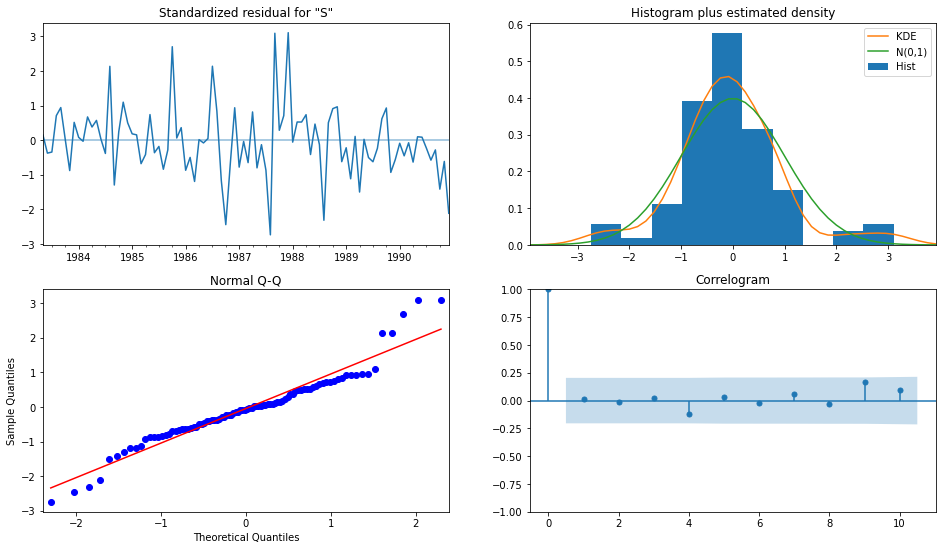

In [123]:
results_auto_SARIMA.plot_diagnostics();

# Predict on the Test Set using this model and evaluate the model.

In [124]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [125]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

Sparkling,mean,mean_se,mean_ci_lower,mean_ci_upper
1991-01-01,1389.369591,415.863847,574.291427,2204.447754
1991-02-01,1224.691307,427.869021,386.083435,2063.299178
1991-03-01,1673.367141,428.013653,834.475796,2512.258485
1991-04-01,1533.341251,432.776570,685.114761,2381.567742
1991-05-01,1425.977453,435.889955,571.648840,2280.306066


In [126]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Sparkling'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 601.1892685584179 
MAPE: 25.867910369867964


In [127]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['SARIMA(3,1,1)(3,0,0,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE,MAPE
"ARIMA(1,1,1)",1319.936736,42.091704
"SARIMA(3,1,1)(3,0,0,12)",601.189269,25.867910


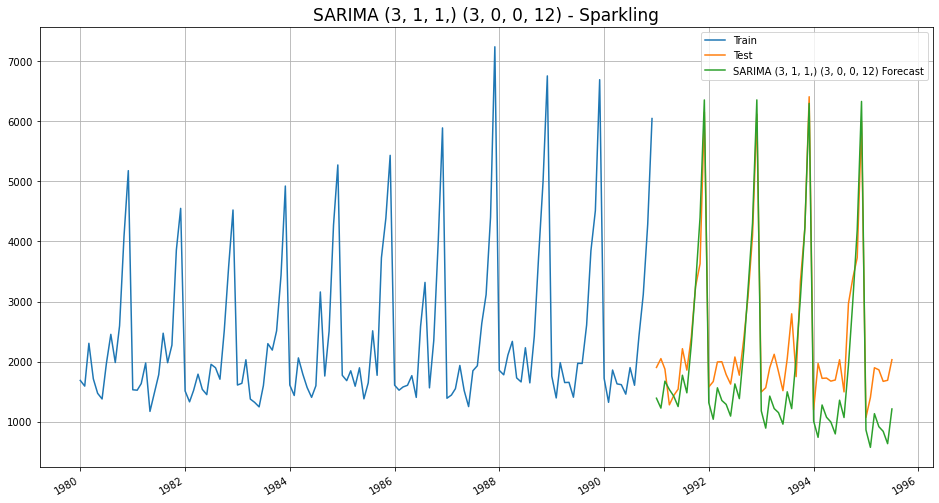

In [129]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')
# plt.plot(predicted_auto_SARIMA,label='SARIMA(3, 1, 1)(3, 0, 2, 12)')
# predicted_auto_SARIMA.plot(label='SARIMA(3, 1, 1)(3, 0, 2, 12)')
predicted_auto_SARIMA.predicted_mean.plot(label='SARIMA (3, 1, 1,) (3, 0, 0, 12) Forecast')


plt.legend(loc='best')
plt.grid()
plt.title('SARIMA (3, 1, 1,) (3, 0, 0, 12) - Sparkling', fontsize=17);

plt.savefig('spark_sarima_auto_30012.jpg', bbox_inches='tight');

# Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots. - Seasonality at 12.

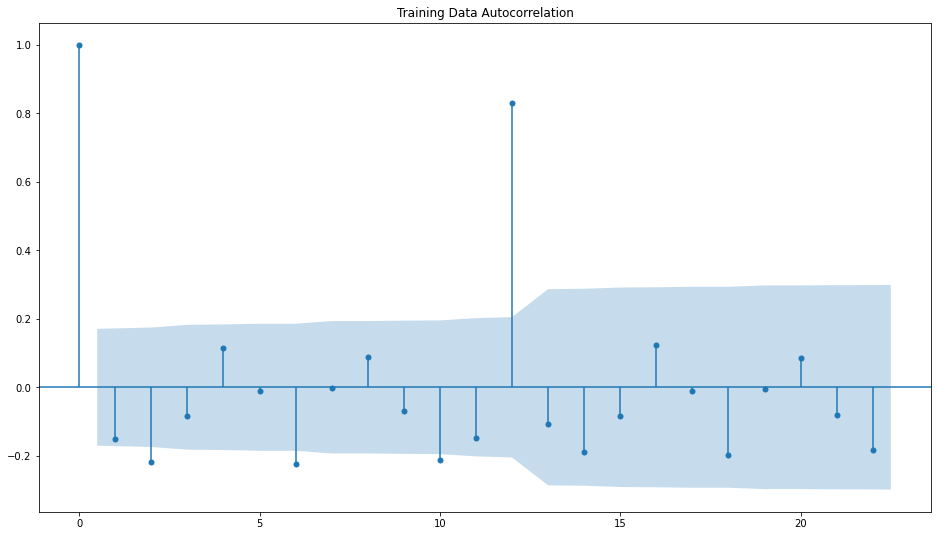

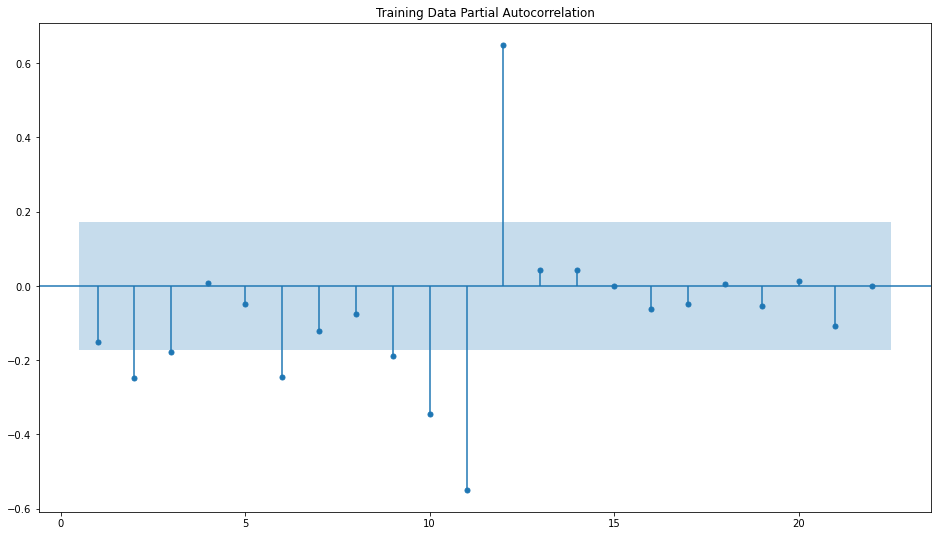

In [140]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle');

In [143]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Sparkling'],
                                order=(0,1,0),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                      SARIMAX Results                                       
Dep. Variable:                            Sparkling   No. Observations:                  132
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -811.162
Date:                              Sun, 22 May 2022   AIC                           1628.324
Time:                                      16:40:00   BIC                           1636.315
Sample:                                  01-01-1980   HQIC                          1631.563
                                       - 12-01-1990                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.1482      0.223      0.664      0.507      -0.289       0.586
ma.S.L12      -0.57

In [147]:
predicted_manual_SARIMA4 = results_manual_SARIMA4.get_forecast(steps=len(test))

In [148]:
rmse4 = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA4.predicted_mean,squared=False)
mape4 = mean_absolute_percentage_error(test['Sparkling'],predicted_manual_SARIMA4.predicted_mean)
print('RMSE:',rmse4,'\nMAPE:',mape4)

RMSE: 1189.835783875609 
MAPE: 54.87253572001247


In [141]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Sparkling'],
                                order=(0,1,0),
                                seasonal_order=(2, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA1 = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA1.summary())

C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                        SARIMAX Results                                        
Dep. Variable:                               Sparkling   No. Observations:                  132
Model:             SARIMAX(0, 1, 0)x(2, 1, [1, 2], 12)   Log Likelihood                -722.996
Date:                                 Sun, 22 May 2022   AIC                           1455.991
Time:                                         16:38:22   BIC                           1468.708
Sample:                                     01-01-1980   HQIC                          1461.128
                                          - 12-01-1990                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.2445      0.879     -0.278      0.781      -1.967       1

In [149]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Sparkling'],
                                order=(0,1,0),
                                seasonal_order=(3, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA2 = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA2.summary())

C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                        SARIMAX Results                                        
Dep. Variable:                               Sparkling   No. Observations:                  132
Model:             SARIMAX(0, 1, 0)x(3, 1, [1, 2], 12)   Log Likelihood                -638.304
Date:                                 Sun, 22 May 2022   AIC                           1288.607
Time:                                         16:40:47   BIC                           1303.120
Sample:                                     01-01-1980   HQIC                          1294.438
                                          - 12-01-1990                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -1.0545      0.201     -5.254      0.000      -1.448      -0

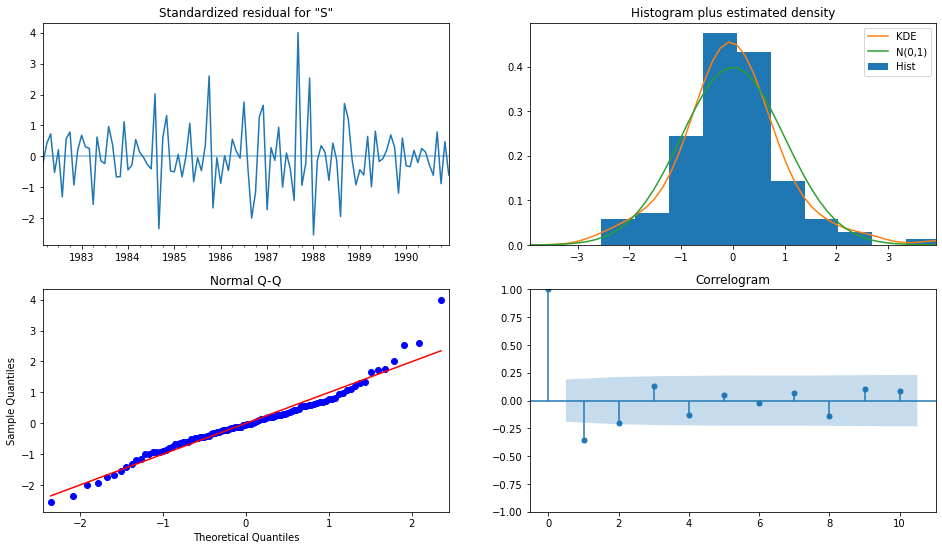

In [150]:
results_manual_SARIMA.plot_diagnostics()
plt.savefig('spark_sarima_11112.jpg', bbox_inches='tight');

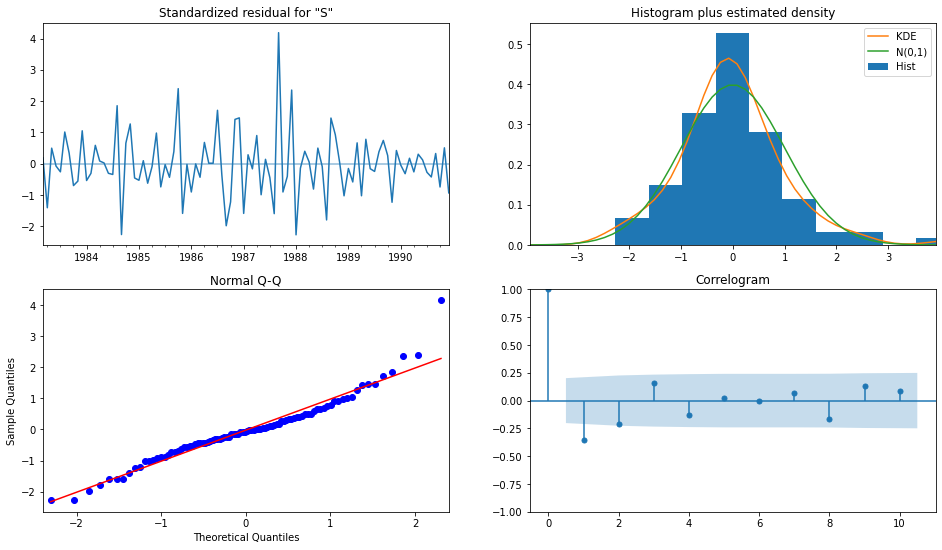

In [151]:
results_manual_SARIMA1.plot_diagnostics()
plt.savefig('spark_sarima_21212.jpg', bbox_inches='tight');

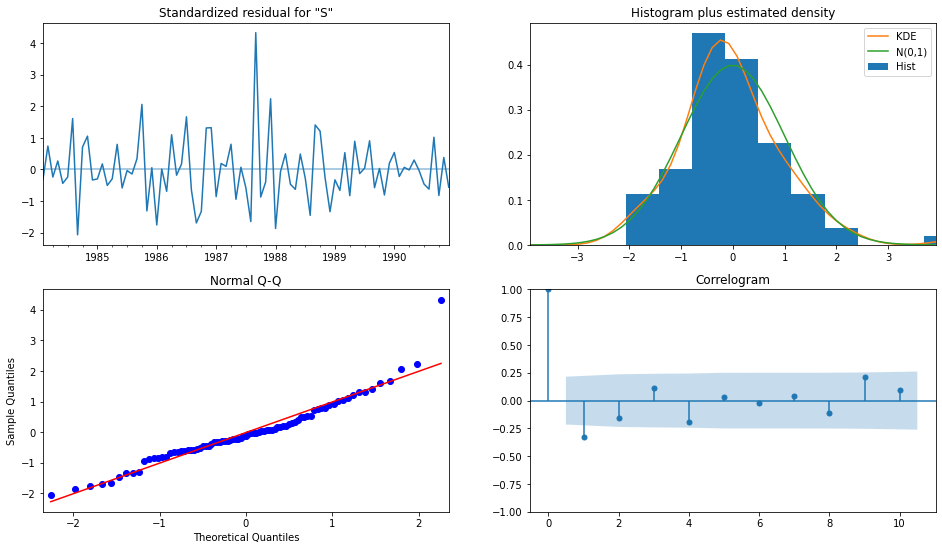

In [138]:
results_manual_SARIMA2.plot_diagnostics()
plt.savefig('spark_sarima_31212.jpg', bbox_inches='tight');

# Predict on the Test Set using this model and evaluate the model.

In [152]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(test))
                                                             
predicted_manual_SARIMA1 = results_manual_SARIMA1.get_forecast(steps=len(test))

predicted_manual_SARIMA2 = results_manual_SARIMA2.get_forecast(steps=len(test))

In [153]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Sparkling'],predicted_manual_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 1189.835783875609 
MAPE: 54.87253572001247


In [154]:
rmse1 = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA.predicted_mean,squared=False)
mape1 = mean_absolute_percentage_error(test['Sparkling'],predicted_manual_SARIMA1.predicted_mean)
print('RMSE:',rmse1,'\nMAPE:',mape1)

RMSE: 1189.835783875609 
MAPE: 81.78522637905738


In [155]:
rmse2 = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA.predicted_mean,squared=False)
mape2 = mean_absolute_percentage_error(test['Sparkling'],predicted_manual_SARIMA2.predicted_mean)
print('RMSE:',rmse2,'\nMAPE:',mape2)

RMSE: 1189.835783875609 
MAPE: 71.56621522003076


In [156]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse, rmse1, rmse2],'MAPE':[mape, mape1, mape2]}
                           ,index=['SARIMA(0,1,0)(1,1,1,12)', 'SARIMA(0,1,0)(2,1,2,12)', 'SARIMA(0,1,0)(3,1,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf


,RMSE,MAPE
"ARIMA(1,1,1)",1319.936736,42.091704
"SARIMA(3,1,1)(3,0,0,12)",601.189269,25.867910
"SARIMA(0,1,0)(1,1,1,12)",1189.835784,54.872536
"SARIMA(0,1,0)(2,1,2,12)",1189.835784,81.785226
"SARIMA(0,1,0)(3,1,2,12)",1189.835784,71.566215


In [157]:
full_data_model = sm.tsa.statespace.SARIMAX(df['Sparkling'],
                                order=(3,1,1),
                                seasonal_order=(3, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                      SARIMAX Results                                      
Dep. Variable:                           Sparkling   No. Observations:                  187
Model:             SARIMAX(3, 1, 1)x(3, 0, [], 12)   Log Likelihood               -1088.658
Date:                             Sun, 22 May 2022   AIC                           2193.316
Time:                                     16:41:14   BIC                           2217.239
Sample:                                 01-01-1980   HQIC                          2203.036
                                      - 07-01-1995                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1219      0.082      1.492      0.136      -0.038       0.282
ar.L2         -0.0649      

# Evaluate the model on the whole data and predict 20 months into the future (till the end of next year).

In [159]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=12)

In [160]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head(12)

Sparkling,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-01,1923.340941,395.338869,1148.490996,2698.190885
1995-09-01,2466.175846,399.706727,1682.765057,3249.586635
1995-10-01,3309.887018,399.781721,2526.329243,4093.444792
1995-11-01,3951.803988,400.747406,3166.353505,4737.254471
1995-12-01,6171.957456,401.146186,5385.725379,6958.189533
1996-01-01,1159.850647,401.288244,373.340140,1946.361153
1996-02-01,1584.124526,401.480045,797.238097,2371.010956
1996-03-01,1820.025822,401.675816,1032.755690,2607.295954
1996-04-01,1845.778411,401.856360,1058.154417,2633.402404
1996-05-01,1677.762159,402.037630,889.782883,2465.741435


In [161]:
rmse = mean_squared_error(df['Sparkling'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 532.9312313155455


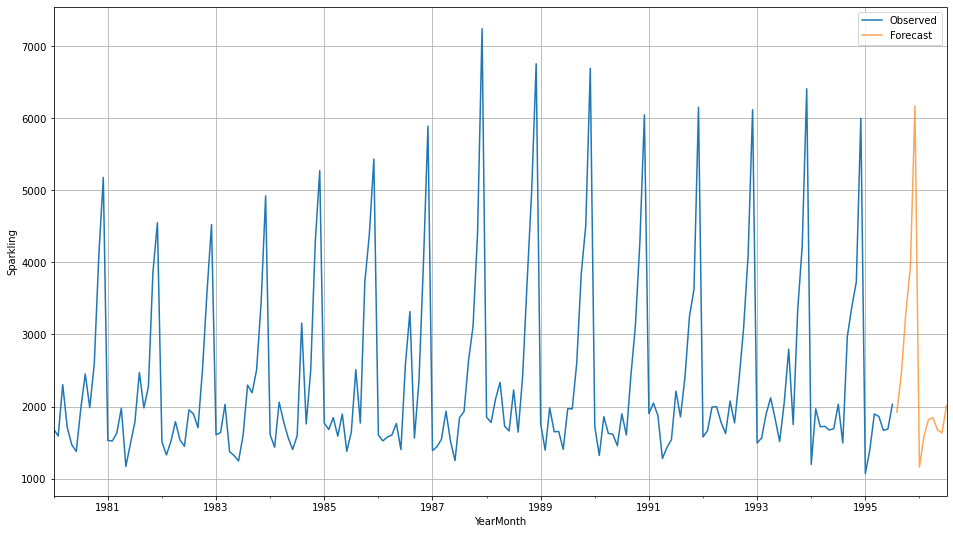

In [162]:
axis = df['Sparkling'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)

axis.set_xlabel('YearMonth')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.grid();

In [163]:
resultsS0 = resultsDf.copy()

resultsS0.to_csv('spark_all_arima.csv')

In [164]:
results_all_spark = pd.concat([resultsDf], axis=0)
results_all_spark

,RMSE,MAPE
"ARIMA(1,1,1)",1319.936736,42.091704
"SARIMA(3,1,1)(3,0,0,12)",601.189269,25.867910
"SARIMA(0,1,0)(1,1,1,12)",1189.835784,54.872536
"SARIMA(0,1,0)(2,1,2,12)",1189.835784,81.785226
"SARIMA(0,1,0)(3,1,2,12)",1189.835784,71.566215


# ForeCasting for Next 12 Months.

In [165]:
model_TES_am = ExponentialSmoothing(test,trend='add',seasonal='multiplicative',initialization_method='estimated', damped_trend=True)
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)

C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'



==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.07571435441953116, 'smoothing_trend': 0.07571434614985234, 'smoothing_seasonal': 0.00010007544990037514, 'damping_trend': 0.9899999834214244, 'initial_level': 2424.285931053572, 'initial_trend': 8.59137844347835, 'initial_seasons': array([0.63022067, 0.73969853, 0.7928912 , 0.77168089, 0.71002959,
       0.68726503, 0.87848178, 0.85183216, 1.00636284, 1.36224522,
       1.63587436, 2.57445019]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [166]:
TES_predict_am_damp_spark =  model_TES_am.forecast(steps=12)
TES_predict_am_damp_spark
prediction_1 = TES_predict_am_damp_spark
TES_predict_am_damp_spark.to_csv('spark_forecast_tes.csv')

In [167]:
plt.rcParams["figure.figsize"] = [16,9]

In [168]:
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(model_TES_am.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(model_TES_am.resid,ddof=1)})
pred_1_df.head()

,lower_CI,prediction,upper_ci
1995-08-01,1428.625097,1944.001392,2459.377687
1995-09-01,1777.037724,2292.414019,2807.790314
1995-10-01,2582.006024,3097.382319,3612.758614
1995-11-01,3197.365473,3712.741768,4228.118063
1995-12-01,5316.942126,5832.318421,6347.694716


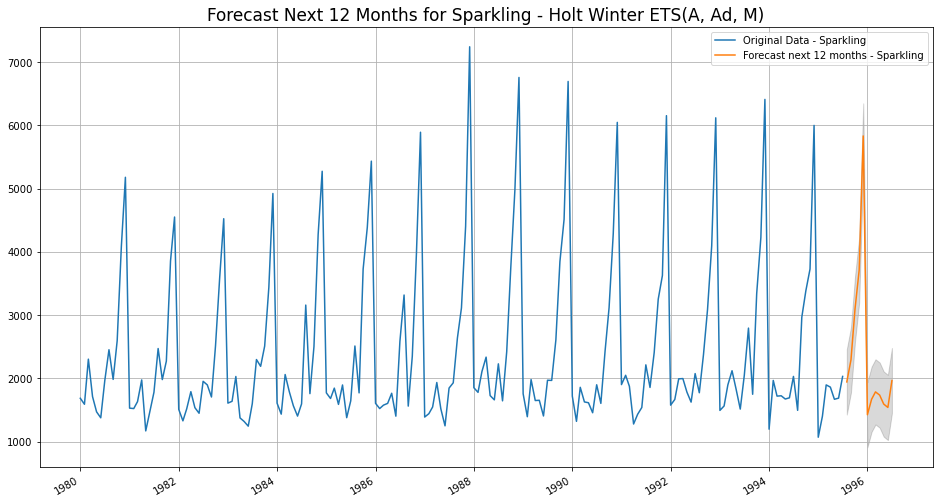

In [169]:
plt.plot(df['Sparkling'], label='Original Data - Sparkling')

ax =TES_predict_am_damp_spark.plot(label='Forecast next 12 months - Sparkling')


ax.fill_between(pred_1_df.index,pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)

plt.legend(loc='best')
plt.grid()
plt.title('Forecast Next 12 Months for Sparkling - Holt Winter ETS(A, Ad, M)', fontsize=17);

plt.savefig('spark_forecast_tes.jpg', bbox_inches='tight');